In [ ]:
 #Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
save_path='/content/drive/MyDrive/'
#!ls /content/drive/MyDrive/
%cd /content/drive/MyDrive/Colab Notebooks/
"""
with open(save_path+'readme.txt','w') as f:
    f.write('bonjour toi!')
"""

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


"\nwith open(save_path+'readme.txt','w') as f:\n    f.write('bonjour toi!')\n"

In [ ]:
"""
link1 = "https://drive.google.com/file/d/1Hrg55pHOUiJSP1L8dLCC0austjFYRVSl/view?usp=sharing"
link2 = "https://drive.google.com/file/d/1HQ0raP1l5b-DKJ_BYnJrOAUYTeuIo9JA/view?usp=sharing"

id = link1.split("/")[-2]
print(id)
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('df_news.csv') 

id1 = link2.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id1})
downloaded.GetContentFile('test.csv') 
"""

'\nlink1 = "https://drive.google.com/file/d/1Hrg55pHOUiJSP1L8dLCC0austjFYRVSl/view?usp=sharing"\nlink2 = "https://drive.google.com/file/d/1HQ0raP1l5b-DKJ_BYnJrOAUYTeuIo9JA/view?usp=sharing"\n\nid = link1.split("/")[-2]\nprint(id)\ndownloaded = drive.CreateFile({\'id\':id})\ndownloaded.GetContentFile(\'df_news.csv\') \n\nid1 = link2.split("/")[-2]\n \ndownloaded = drive.CreateFile({\'id\':id1})\ndownloaded.GetContentFile(\'test.csv\') \n'

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score, f1_score,classification_report
%matplotlib inline
#import seaborn as sns
import joblib
import numpy as np 
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import os
import re
import nltk

#df = pd.read_csv('df_news.csv')
#print(df)

In [207]:
train=pd.read_csv('df_news.csv', on_bad_lines='skip')#,encoding='ISO-8859-15')
test=pd.read_csv('test.csv', on_bad_lines='skip')

In [ ]:
train.head()
 
test.head()

,id,author,title,text,label
0,0,ecomatin,Région de l’Est : 35% d’enfants atteints de ma...,La révélation est faite par plusieurs enquêtes...,0
1,1,ecomatin,"Inflation : Bertoua, ville la plus chère de 20...",C’est l’une des principales informations de la...,0
2,2,ecomatin,"CHR de Bertoua : un chantier de 8,9 milliards ...",C’est le constat fait par le ministre de la Sa...,0
3,3,ecomatin,"À l’Est, la DGI table sur des recettes fiscale...",L’objectif visé par cette entité publique est ...,0
4,4,ecomatin,La région de l’Est a collecté près de 250 mill...,Cette somme est constituée des taxes issues de...,0


In [208]:
print(train.isnull().sum())
print('************')
print(train.shape)
print(test.isnull().sum())

id        121
source    121
title     121
text        3
author    121
theme     121
label       0
dtype: int64
************
(4406, 7)
id        0
author    0
title     0
text      0
label     0
dtype: int64


In [ ]:
test=test.fillna(' ')
train=train.fillna(' ')
train['total']=train['title']+' '+train['author']+train['text']
test['total']=test['title']+' '+test['author']+test['text']

test.head()

,id,author,title,text,label,total
0,0,ecomatin,Région de l’Est : 35% d’enfants atteints de ma...,La révélation est faite par plusieurs enquêtes...,0,Région de l’Est : 35% d’enfants atteints de ma...
1,1,ecomatin,"Inflation : Bertoua, ville la plus chère de 20...",C’est l’une des principales informations de la...,0,"Inflation : Bertoua, ville la plus chère de 20..."
2,2,ecomatin,"CHR de Bertoua : un chantier de 8,9 milliards ...",C’est le constat fait par le ministre de la Sa...,0,"CHR de Bertoua : un chantier de 8,9 milliards ..."
3,3,ecomatin,"À l’Est, la DGI table sur des recettes fiscale...",L’objectif visé par cette entité publique est ...,0,"À l’Est, la DGI table sur des recettes fiscale..."
4,4,ecomatin,La région de l’Est a collecté près de 250 mill...,Cette somme est constituée des taxes issues de...,0,La région de l’Est a collecté près de 250 mill...


In [ ]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id        0
source    0
title     0
text      0
author    0
theme     0
label     0
total     0
dtype: int64
************
id        0
author    0
title     0
text      0
label     0
total     0
dtype: int64


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = stopwords.words('french')

from nltk.corpus import stopwords
real_words = ''
fake_words = ''
stopwords = stopwords.words('french')
  

  
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


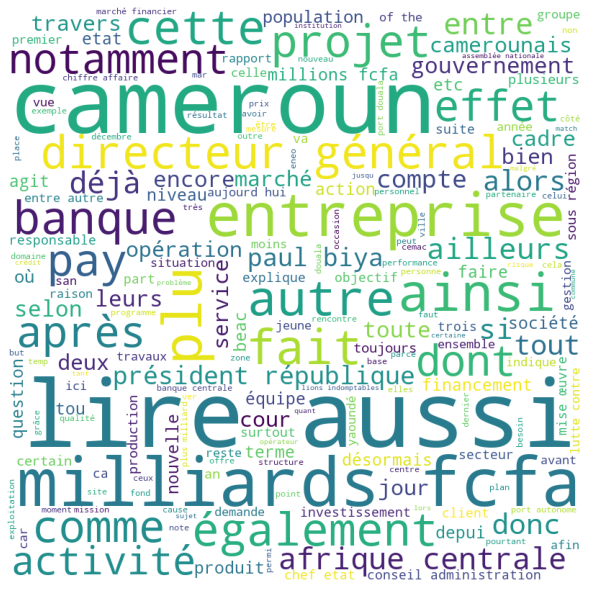

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Cleaning and preprocessing 

##### StopWords

In [ ]:
#Downloading nltk data

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = stopwords.words('french')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'serai

##### Lemmatisation

In [ ]:
from nltk.stem import WordNetLemmatizer

##### Cleaning 

In [ ]:

lemmatizer=WordNetLemmatizer()
whitespace = re.compile("[\\s]+", re.UNICODE)
dash = re.compile("[\\-\\˗\\֊\\‐\\‑\\‒\\–\\—\\⁻\\₋\\−\\﹣\\－]")
left_parenthesis_filter = re.compile("[\\(\\[\\{\\⁽\\₍\\❨\\❪\\﹙\\（]")
right_parenthesis_filter = re.compile("[\\)\\]\\}\\⁾\\₎\\❩\\❫\\﹚\\）]")
currencies = re.compile("[¥£₪$€฿₨]")
apostrophe_filter = re.compile(
    r'&#39;|[ʼ՚＇‘’‛❛❜ߴߵ`‵´ˊˋ{}{}{}{}{}{}{}{}{}]'.format(
        chr(768), chr(769), chr(832),
        chr(833), chr(2387), chr(5151),
        chr(5152), chr(65344), chr(8242)
    ), re.UNICODE
)
basic_cleaner = re.compile(r'[^\w\s{}]'.format(re.escape("€-!?/;\"'%&<>.()@#:,|=*")), re.UNICODE)
def clean_text(sent):
    filter_sentence = ''
    
    sentence = sent
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning the punctuation
    sentence = str.strip(str.lower(sentence))
    sentence = whitespace.sub(' ', sentence)
    sentence = dash.sub('-', sentence)
    sentence = currencies.sub('€', sentence)
    sentence = apostrophe_filter.sub("'", sentence)
    sentence = left_parenthesis_filter.sub("(", sentence)
    sentence = right_parenthesis_filter.sub(")", sentence)
    
    words = nltk.word_tokenize(sentence) #tokenization the words of the sentences
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
    return filter_sentence
for index,row in train.iterrows():
    train.loc[index,'total'] = clean_text(row['total'])
train.head()

for index,row in test.iterrows():
    test.loc[index,'total'] = clean_text(row['total'])
test.head()


,id,author,title,text,label,total
0,0,ecomatin,Région de l’Est : 35% d’enfants atteints de ma...,La révélation est faite par plusieurs enquêtes...,0,région lest 35 denfants atteints malnutrition...
1,1,ecomatin,"Inflation : Bertoua, ville la plus chère de 20...",C’est l’une des principales informations de la...,0,inflation bertoua ville plus chère 2016 2021 ...
2,2,ecomatin,"CHR de Bertoua : un chantier de 8,9 milliards ...",C’est le constat fait par le ministre de la Sa...,0,chr bertoua chantier 89 milliard paralysé dep...
3,3,ecomatin,"À l’Est, la DGI table sur des recettes fiscale...",L’objectif visé par cette entité publique est ...,0,lest dgi table recettes fiscales 12 milliard ...
4,4,ecomatin,La région de l’Est a collecté près de 250 mill...,Cette somme est constituée des taxes issues de...,0,région lest a collecté près 250 million recet...


In [ ]:
real_words = ''
fake_words = ''
#stopwords = set(STOPWORDS) 
print(stop_words) 
# iterate through the csv file 
for val in train[train['label']==1].total: 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

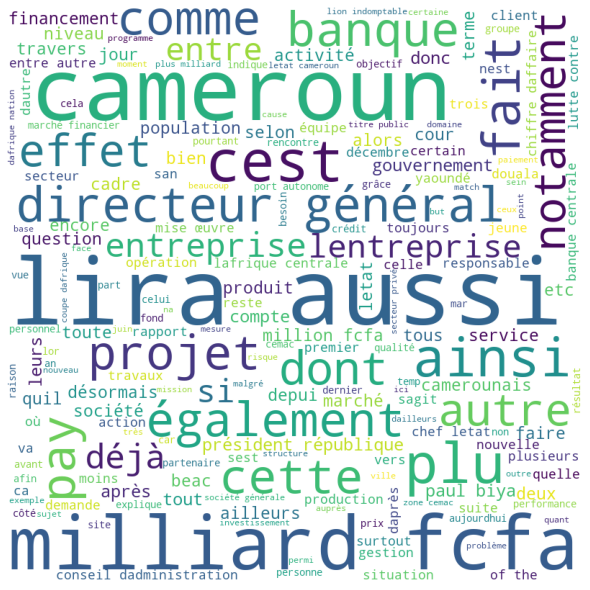

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Applying NLP Techniques

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train = train['total']
Y_train = train['label']
#print(X_train)

In [ ]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

#### Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Modelling

In [ ]:
#test_counts = count_vectorizer.transform(test['total'].values)
#test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=12,test_size=0.3)

## Logistic Regression

##### evaluation the regularisation parameters C 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


regularisation parameter C is :0.001
Accuracy of Logistic classifier on training set: 0.95
Accuracy of Logistic classifier on test set: 0.96
regularisation parameter C is :0.003
Accuracy of Logistic classifier on training set: 0.95
Accuracy of Logistic classifier on test set: 0.96
regularisation parameter C is :0.01
Accuracy of Logistic classifier on training set: 0.95
Accuracy of Logistic classifier on test set: 0.96
regularisation parameter C is :0.03
Accuracy of Logistic classifier on training set: 0.95
Accuracy of Logistic classifier on test set: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


regularisation parameter C is :0.1
Accuracy of Logistic classifier on training set: 0.95
Accuracy of Logistic classifier on test set: 0.96
regularisation parameter C is :0.3
Accuracy of Logistic classifier on training set: 0.95
Accuracy of Logistic classifier on test set: 0.96
regularisation parameter C is :1
Accuracy of Logistic classifier on training set: 0.95
Accuracy of Logistic classifier on test set: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


regularisation parameter C is :3
Accuracy of Logistic classifier on training set: 0.97
Accuracy of Logistic classifier on test set: 0.96
regularisation parameter C is :10
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


regularisation parameter C is :12
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.96
regularisation parameter C is :14
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


regularisation parameter C is :16
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.96
regularisation parameter C is :18
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


regularisation parameter C is :20
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
regularisation parameter C is :22
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


regularisation parameter C is :24
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
regularisation parameter C is :26
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


regularisation parameter C is :28
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97
regularisation parameter C is :29
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))


regularisation parameter C is :30
Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.97


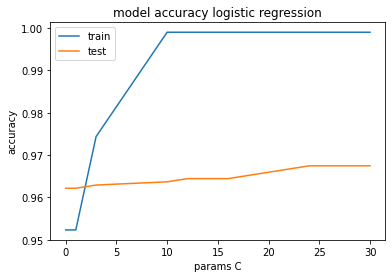

In [ ]:
from sklearn.linear_model import LogisticRegression# Logistic Regression
from sklearn.metrics import accuracy_score
"""
#-------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-5,5,20),"penalty":["l2"]}
logreg = LogisticRegression(n_jobs=-1,solver='liblinear',max_iter=600)
loreg_cv=GridSearchCV(logreg,grid,cv=3,scoring="f1")
loreg_cv.fit(X_train, y_train)
print('best parameters:',loreg_cv.best_params_)
#-------------------------------------------------------------------
"""
cs=[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,12,14,16,18,20,22,24,26,28,29,30]#300,1000,3000,10000,30000,100000,300000,1000000,3000000]
f_train=[]
f_test=[]
response=[]
for c in cs:
     logreg = LogisticRegression(C=c,n_jobs=-1,solver='liblinear',max_iter=600)
     #logreg = LogisticRegression(C=1e5)
     logreg.fit(X_train, y_train)
     pred = logreg.predict(X_test)
     pred2 = logreg.predict(X_train)
     print('regularisation parameter C is :'+str(c))
     print('Accuracy of Logistic classifier on training set: {:.2f}'
          .format(accuracy_score(y_train, pred2)))
     
     #precision_score(y_true, y_pred, average='micro')
     print('Accuracy of Logistic classifier on test set: {:.2f}'
          .format(accuracy_score(y_test, pred)))
     f_train.append(accuracy_score(y_train, pred2))
     f_test.append(accuracy_score(y_test, pred))
     
#plt.plot(cs)
plt.plot(cs,f_train)
#plt.show()

#plt.plot(cs)
plt.plot(cs,f_test)
plt.title('model accuracy logistic regression')
plt.ylabel('accuracy')
plt.xlabel('params C')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
logreg = LogisticRegression(C=15,n_jobs=-1,max_iter=600)
     #logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

LogisticRegression(C=15, max_iter=600, n_jobs=-1)

## Naive Baiyes

##### evaluation the regularisation parameters alpha

regularisation parameter C is :0.001
Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1272
           1       0.59      0.26      0.36        50

    accuracy                           0.97      1322
   macro avg       0.78      0.63      0.67      1322
weighted avg       0.96      0.97      0.96      1322

[[1263    9]
 [  37   13]]


regularisation parameter C is :0.003
Accuracy of NB  classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1272
           1       0.52      0.28      0.36        50

    accuracy                           0.96      1322
   macro avg       0.75      0.63      0.67      1322
weighted avg       0.96      0.96      0.96      1322

[[1259   13]
 [  36   14]]


regularisation parameter C i

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

regularisation parameter C is :1
Accuracy of NB  classifier on training set: 0.95
Accuracy of NB classifier on test set: 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1272
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1322
   macro avg       0.48      0.50      0.49      1322
weighted avg       0.93      0.96      0.94      1322

[[1272    0]
 [  50    0]]


regularisation parameter C is :3
Accuracy of NB  classifier on training set: 0.95
Accuracy of NB classifier on test set: 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1272
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1322
   macro avg       0.48      0.50      0.49      1322
weighted avg       0.93      0.96      0.94      1322

[[1272    0]
 [  50    0]]


regularisation parameter C is :10
Ac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

[[1272    0]
 [  50    0]]


regularisation parameter C is :18
Accuracy of NB  classifier on training set: 0.95
Accuracy of NB classifier on test set: 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1272
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1322
   macro avg       0.48      0.50      0.49      1322
weighted avg       0.93      0.96      0.94      1322

[[1272    0]
 [  50    0]]


regularisation parameter C is :20
Accuracy of NB  classifier on training set: 0.95
Accuracy of NB classifier on test set: 0.96
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1272
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1322
   macro avg       0.48      0.50      0.49      1322
weighted avg       0.93      0.96      0.94      1322

[[1272    0]
 [  50    0]]


regul

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

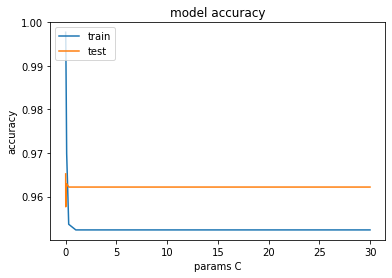

In [ ]:
from sklearn.naive_bayes import MultinomialNB
cs=[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,12,14,16,18,20,22,24,26,28,29,30]#,100,300,1000,3000,10000,30000,100000,300000,1000000,3000000]
f_train=[]
f_test=[]

for c in cs:
     bayes = MultinomialNB(alpha=c)
     bayes.fit(X_train, y_train)
     pred = bayes.predict(X_test)
     print('regularisation parameter C is :'+str(c))
     print('Accuracy of NB  classifier on training set: {:.2f}'
          .format(bayes.score(X_train, y_train)))
     print('Accuracy of NB classifier on test set: {:.2f}'
          .format(bayes.score(X_test, y_test)))
     """
     print('precision of Logistic classifier on test set: {:.2f}'
          .format(precision_score(y_test, pred, average='micro')))
     
     print('f1-score of Logistic classifier on test set: {:.2f}'
          .format(f1_score(y_test, pred, average='micro')))
     """
     f_train.append(bayes.score(X_train, y_train))
     f_test.append(bayes.score(X_test, y_test))
     print(classification_report(y_test, pred))
     #confusion_matrix(y_test, pred)
     cm2 = confusion_matrix(y_test, pred)
     print(cm2)
     #plot_confusion_matrix(cm2, classes=['FAKE', 'REAL'])
     print('\n')
     """
     cm2 = confusion_matrix(y_test, pred)
     cm2
     """
#plt.plot(cs)
plt.plot(cs,f_train)
#plt.show()

#plt.plot(cs)
plt.plot(cs,f_test)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('params C')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
##a supprime
#plot_confusion_matrix(cm2, classes=['fake','Real'])

In [ ]:
bayes = MultinomialNB(alpha=0.3)
bayes.fit(X_train, y_train)

MultinomialNB(alpha=0.3)

## Tree

regularisation parameter C is :2
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.97
regularisation parameter C is :3
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.97
regularisation parameter C is :5
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.97
regularisation parameter C is :7
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.97
regularisation parameter C is :9
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.97
regularisation parameter C is :11
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.97
regularisation parameter C is :12
Accuracy of Adaboost classifier on training set: 1.00
Accuracy of Adaboost classifier on test set: 0.97
regularisation parameter C is :13
Accur

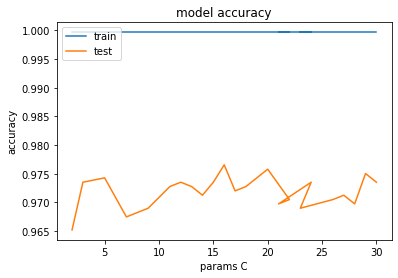

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)

from sklearn.model_selection import GridSearchCV
"""
grid={'max_leaf_nodes':list(range(2,200)),
      'min_samples_split':[2,3,5,7,9,11,12,15,16,17,18,20,22,23,24,25,26,28,30,32,33,34]}

grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),grid,verbose=1,cv=3,)
grid_search.fit(X_train, y_train)
grid_search.fit(X_train, y_train)
print('best parameters:',grid_search.best_params_)
print('\n')
"""
depthSize=[2,3,5,7,9,11,12,13,14,15,16,17,18,20,22,21,24,23,26,27,28,29,30]
f_train=[]
f_test=[]
for c in depthSize:
     Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=c),n_estimators=50)
     Adab.fit(X_train, y_train)
     pred = Adab.predict(X_test)
     
     print('regularisation parameter C is :'+str(c))
     print('Accuracy of Adaboost classifier on training set: {:.2f}'
          .format(Adab.score(X_train, y_train)))
     print('Accuracy of Adaboost classifier on test set: {:.2f}'
          .format(Adab.score(X_test, y_test)))
     """
     print('precision of Logistic classifier on test set: {:.2f}'
          .format(precision_score(y_test, pred, average='micro')))
     
     print('f1-score of Logistic classifier on test set: {:.2f}'
          .format(f1_score(y_test, pred, average='micro')))
     """
     f_train.append(Adab.score(X_train, y_train))
     f_test.append(Adab.score(X_test, y_test))
     
     #plot_confusion_matrix(cm3, classes=['FAKE', 'REAL'])
     """
     cm3 = confusion_matrix(y_test, pred)
     cm3
     """
#plt.plot(cs)
plt.plot(depthSize,f_train)
#plt.show()

#plt.plot(cs)
plt.plot(depthSize, f_test)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('params C')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
##a supprime
#plot_confusion_matrix(cm3, classes=['fake','Real'])


In [ ]:
Adab= AdaBoostClassifier(DecisionTreeClassifier(max_depth=15),n_estimators=50)
Adab.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15))

##### training the different in the dataset which is for cameroon 

In [ ]:
data=[]
"""
texts=["Choupo-Moting ne dansant pas après le limogeage de Toni Conceiçao,depuis le 28 février 2022 sur Facebook prétend montrer linternational camerounais Éric Maxim Choupo-Moting en train de danser suite au limogeage de Toni Conceiçao sur la sellette après la défaite du Cameroun face à lÉgypte en demi-finale de la Coupe dAfrique des nations (CAN) qua organisée le pays. Quand Choupo Moting apprend que Conceçao vient dêtre viré. La terre est vraiment très sale?. On y voit lattaquant du Bayern de Munich descendre de son véhicule et esquisser des pas de danse au sol sur le titre ?Wolosso ?du chanteur ivoirien Dollar DJ sport facebook",
                      "Tribune de la Forêt, ERIC FOPOUSSI A  ÉTÉ VIRÉ DU GROUPE EQUINOXE,Médias : Eric Fopoussi vient dêtre viré dEquinoxe TV pour ses prises de position positives sur le stade dOlembé ,,media",
                      ",NZui manto Yi sep sep, DES ÉLÈVES DU LYCÉE CLASSIQUE DE BAFOUSSAM FONT COURS DANS DES TOILETTES,KAMALOUM NEWS LES ÉLÈVES DU LYCÉE CLASSIQUE MODERNE DE BAFOUSSAM FONT COURS DANS LES TOILETTES ! (Sic) », la publication montre des garçons et filles en uniforme de classe de couleur bleue, assis sur des table-bancs contenant des cahiers. Ces élèves regardent pour la plupart, dans la direction du tableau noir, collé sur un mur partiellement carrelé. Sur les photos, les côtés du mur ne sont pas les seuls coins qui contiennent les carreaux. Le sol en a également. Et tout comme les murs, ils sont posés par endroit, avec des espaces contenant du siphon. Le type de carreaux et le syphon au sol porte à croire quil sagit bien des toilettes qui, visiblement, ont été transformées en salle de classe,societe",
                      "Bree Magazine,LE MINAT A  DÉCLARÉ EJ JOHNSON PERSONA NON GRATA AU CAMEROUN,EJ Johnson, le fils du célèbre basketteur américain Magic Johnson invité par lUnesco à se rendre au Cameroun a été déclaré persona non grata par le ministre de ladministration territoriale, Paul Ntanga Nji Insolite",
                      "Love kamers sisters ,AUGMENTATION DU PRIX DU GAZ EN VUE,Daprès plusieurs publications devenues virales en début de semaine sur les réseaux sociaux et notamment Facebook, le prix du gaz domestique va passer de 6500 F Cfa à 7320 voire 7500 F Cfa. economie",
                      "Le Fonds monétaire international fournit des dons,,Le Fonds monétaire international fournit des dons en espèces pour aider les gens à traverser COVID-19. Chaque bénéficiaire recevra 1 500 Dollars par mois pendant 3 mois",
                     "PARLE QUE BETI,,Voici les jardiniers bulu Beti en train de mettre la peinture verte sur la pelouse de Japoma. Quelle honte pour mon pays. Un stade au niveau mondial mon il",
                      "Fridolin Nke,« Stop Noso war » et « Free prisoners »,Des poignets menottés illustrent le visuel. Un texte accompagne ces photos.  S. E. Monsieur lambassadeur Albert Roger Milla, S. M. Joseph Antoine Bell, lhonorable Cabral Libiii, le président Samuel Etoo Fils, le comédien célèbre Steve Fah nous rejoignent dans le combat contre la Guerre au NOSO ! MIEUX VAUT TARD QUE JAMAIS. La conscience ne meurt jamais, malgré les endormissements douillets de lhuile de la sardine. NE COMMENTEZ PAS svp !",
                      "le prix de lessence est revu à la baisse au Cameroun",
                      "scoop,Le domicile de clinton Njie situé à Bokwaongo( sud-ouest) incendié hier soir",
                      "NEIGE À BANA,Depuis jeudi dernier, comme une trainée de poudre, la nouvelle de la neige tombée dans cette localité de la région de lOuest est devenue virale sur les réseaux sociaux.Insolite"
                     "Réchauffement climatique: le taux de N2 a dépassé les 50 de présence dans notre atmosphère!,Le GIEC vient de lancer un nouvel appel d’urgence aux dirigeants politiques de tous les Etats! Selon un dernier rapport scientifique, le taux de N2 (diazote) aurait dépassé la barre des 50 de la composition de notre atmosphère. Un record historique, vraisemblablement jamais atteint dans l’histoire de la Terre. Selon Franz R. Shmidt, l’un des scientifiques ayant participé à cette étude, le fait que le seuil de N2 dans notre atmosphère ait dépassé la barre des 50% indique un point clair de non retour: « Nous étions triste lorsque nous avons découvert cela! Jamais ce seuil n’avait été franchi, maintenant les conséquences sur notre planète seront inévitables. C’est un point de non retour que nous avons atteint, même si dans dans un avenir proche, ce taux devait redescendre. Mais nous d’autant pessimistes que, selon nos calculs, ce taux de concentration dans l’atmosphère devrait atteindre 78% en 2100, si nous continuons comme cela! ». Le Président de la République française, Emmanuel Macron, est prêt à lancer l’état d’urgence en France. Mais rien ne presse dans les prochaines heures, a-t-il indiqué au micro de nos confrères de Centrepress. Certaines confirmations doivent encore tomber d’ici les jours qui suivent. Le gouvernement devra donc réagir en conséquence."
                     ]
"""
"""
texts=['Un accident de la circulation fait 5 morts et une trentaine de blessés sur l’axe Douala-Bafoussam',
    'Paul Biya instruit un déblocage des fonds',
     'Un accident de la circulation fait 2905 morts et une trentaine de blessés sur l’axe Douala-Bafoussam',
     'Louis Marie Kakdeu soutient la greve des enseignants'
     'paul biya est mort',
     "Le sultan Bamoun n'affirme pas son appartenance au RDPC",
     'Le Cameroun enregistre déjà 25millions de morts des suites de l’épidémie de rougeole',
     'Grève des enseignants : Paul Biya instruit le déblocage des fonds',
     ' Bayaola Boniface martèle que le personnel qui ne se soumettra pas à cette mesure durant cette période de grève des enseignants, subira les conséquences de son insubordination. Les décisions se prendront sur WhatsApp. C’est l’économie d’un élément audio du secrétaire d’État au ministère des Enseignements secondaires, dont nous avons pu obtenir une copie de sources internes. Les pouvoirs publics, impuissants devant les revendications du personnel enseignants depuis le 21 février dernier, veulent contourner le mouvement d’humeur afin de continuer à assurer la poursuite des programmes dans les établissements scolaires. En effet, dans un message vocal adressé à ses collaborateurs, Bayaola Boniface secrétaire d’Etat au ministère des Enseignements secondaires charge ces derniers à veiller à ce que le personnel administratif prenne le relai dans les établissements',
     'Le secrétaire d’État au MINESEC exige au personnel administratif de remplacer les enseignants grévistes dans les salles de classe',
    '" Ce matin, lors de l’ouverture de la séance à l’Assemblée nationale, un individu a fait irruption dans l’hémicycle et a lancé une banane sur Christiane Taubira en poussant des cris de bonobo, avant de prendre la fuite. Rattrapé par les agents de sécurité, l’auteur présumé de cette agression a été identifié comme étant Mehdi Meklat, égérie du Bondy Blog et étoile montante des Inrockuptibles. Lors de sa garde à vue, Mehdi Meklat aurait accusé son jumeau maléfique Marcelin Deschamps, avant de déclarer : “J’encule vos gros morts et je rafale Charlie Hebdo wallah sur ma vie qu’on va vous refaire un Magnanville avec mes kheys du Bondy Blog”.  Sur son compte Twitter, Christiane Taubira a immédiatement réagi en postant un message d’apaisement.  Pierre Siankowski, directeur de la rédaction des Inrockuptibles, a pour sa part salué la “performance artistique” du jeune trublion.  Quant à Pascale Clarke, elle n’a pas souhaité répondre à nos questions, invoquant une séance imminente d’aquaponey.',
    'Buzzbeed,"En visite en Afghanistan, Marine Le Pen refuse de participer à une lapidation"',
    'BGFI boucle le rachat de Camtel ,"la dénommée BGFI Bank Centrafrique devient ainsi la 32eme filiale du groupe et sa 21e dans la sous-région Americaine',
     "RSE : Société Générale Cameroun offre 3 millions de F dans le cadre de son Charity Challenge 2021,Le « Charity challenge 2021 », organisé par la banque a permis aux associations Ascovime et Chaîne des foyers Saint-Nicodème de bénéficier respectivement de 1,5 million de FCFA destinés au soutien vis-à-vis de la jeunesse défavorisée dont ils ont la charge.  Pour l’édition 2021 du « Charity Challenge » organisé par la Société Générale Cameroun, deux associations ont été retenues : Ascovime et la Chaîne des foyers Saint-Nicodème, des associations basées respectivement à Yaoundé et Douala. Placée sous le thème « Move For Youth », cette action citoyenne des employés de Société Générale Cameroun (SG Cameroun) a pour objectif de soutenir des associations œuvrant pour la jeunesse, par le biais d’un défi sportif. Au Cameroun, les villes de Yaoundé et de Douala ont été mises à contribution pour l’apothéose sportive (danse sportive) respectivement les 18 et 25 septembre 2021. 30 employés de SG Cameroun, ont à cet effet été mobilisés à Yaoundé, plus de 80 à Douala, à la Rue Joss, devant le siège de la banque. « Cet exercice de SG Cameroun s’inscrit dans la grande semaine solidarité du Groupe Société Générale qui cette année a pour objectif la jeunesse. Tous les salariés se sont mobilisés dans un élan solidaire et sportif », s’est exprimé Nicolas Pichou, le Directeur Général de SG Cameroun. Lire aussi : Droits sociaux: Société générale Cameroun sommée de négocier avec ses ex-employés Il s’agit précisément pour la banque de faire un pont entre les finances, l’éducation et l’insertion socio-professionnelle. « Le Charity Challenge de Société Générale est un challenge solidaire international connecté qui permet cette année de mobiliser l’ensemble des collaborateurs du groupe Société Générale du Cameroun autour de la cause des jeunes. Nous voulons accompagner la jeunesse dans son insertion. Nous avons une Fondation d’entreprise dont le rôle est de soutenir la communauté. Cette année nous accompagnons la jeunesse à travers le sport sur l’ensemble du pays. Il s’agit de générer des fonds par l’effort collectif de chacun », a relevé Blaise Etoa, le Directeur Marketing et Communication de SG Cameroun. Le concept ici implique la réalisation d’un pas, pour un montant de 3 FCFA. Au terme du « Charity Challenge 2021 », les collaborateurs de la banque ont cumulé 1 000 000 de pas, équivalent à une cagnotte de 3 millions de FCFA, à reverser aux deux associations bénéficiaires. « SG Cameroun s’est engagée à donner 3 FCFA pour chaque pas fait par les salariés, et nous sommes parvenus à plus de 3 millions de FCFA que nous avons remis à ces associations qui œuvrent pour la jeunesse défavorisée à Douala et à Yaoundé », a ajouté Nicolas Pichou. Lire aussi : Société générale Cameroun a accordé 802 milliards de crédits en 2020  L’Association des compétences pour une vie meilleure (Ascovime) et la Chaîne des foyers Saint-Nicodème ont respectivement reçu un chèque de 1,5 millions de FCFA. Ces deux associations ont été sélectionnées sur la base de rigoureux critères définis par Blaise Etoa : « ce sont des associations qui encadrent nos populations dans leurs activités au quotidien. La Chaîne des Foyers Saint-Nicodème exerce dans l’insertion professionnelle des enfants de la rue. Et Ascovime travaille pour la santé et l’éducation des enfants de nos zones enclavées », a clarifié le Directeur Marketing et Communication  de SG Cameroun. Le Dr. Boucar Ekani, vice-président d’Ascovime et le Père Serges Evina, Directeur de la Chaîne des Foyers Saint-Nicodème ont confirmé, au terme de la session sportive de ce samedi 25 septembre 2021, une affectation intégrale des fonds reçus au profit de leurs cibles respectives, tout en saluant l’action solidaire menée par banque. Pour rappel, depuis 2015, Société Générale Cameroun a consacré plus de 300 millions de FCFA à des actions solidaires au Cameroun. Les axes de mécénat et de sponsoring de cet établissement de crédits sont basés sur l’insertion socioprofessionnelle, le sport et la culture : « Toutes choses qui permettent après nos activités commerciales de pouvoir accompagner les communautés avec lesquelles nous travaillons au quotidien », a conclu Blaise Etoa. Lire aussi : Financement des PME : Société Générale Cameroun ouvre une ligne de crédit de 25 milliards Présente au Cameroun depuis 1963, Société Générale Cameroun dispose de 658 collaborateurs, 132 distributeurs automatiques de billets et 38 agences sur tout le territoire national. La banque compte par ailleurs 245.000 clients répartis entre les grandes entreprises, les petites et moyennes entreprises, les institutions, les professionnels et des particuliers."]
"""

texts=['Un accident de la circulation fait 5 morts et une trentaine de blessés sur l’axe Douala-Bafoussam',
    'Paul Biya instruit un déblocage des fonds',
     'Un accident de la circulation fait 2905 morts et une cinquantaine de blessés sur l’axe Douala-Edea',
     'Louis Marie Kakdeu soutient la greve des enseignants',
     'paul biya est mort',
     "Le sultan Bamoun n'affirme pas son appartenance au RDPC",
     "Le sultan Bamoun affirme son appartenance au RDPC",
     'Le Cameroun enregistre déjà 25millions de morts des suites de l’épidémie de rougeol',
     'Grève des enseignants : Paul Biya instruit le déblocage des fonds',
     ' Bayaola Boniface martèle que le personnel qui ne se soumettra pas à cette mesure durant cette période de grève des enseignants, subira les conséquences de son insubordination. Les décisions se prendront sur WhatsApp. C’est l’économie d’un élément audio du secrétaire d’État au ministère des Enseignements secondaires, dont nous avons pu obtenir une copie de sources internes. Les pouvoirs publics, impuissants devant les revendications du personnel enseignants depuis le 21 février dernier, veulent contourner le mouvement d’humeur afin de continuer à assurer la poursuite des programmes dans les établissements scolaires. En effet, dans un message vocal adressé à ses collaborateurs, Bayaola Boniface secrétaire d’Etat au ministère des Enseignements secondaires charge ces derniers à veiller à ce que le personnel administratif prenne le relai dans les établissements',
     'Le secrétaire d’État au MINESEC exige au personnel administratif de remplacer les enseignants grévistes dans les salles de classe',
    '" Ce matin, lors de l’ouverture de la séance à l’Assemblée nationale, un individu a fait irruption dans l’hémicycle et a lancé une banane sur Christiane Taubira en poussant des cris de bonobo, avant de prendre la fuite. Rattrapé par les agents de sécurité, l’auteur présumé de cette agression a été identifié comme étant Mehdi Meklat, égérie du Bondy Blog et étoile montante des Inrockuptibles. Lors de sa garde à vue, Mehdi Meklat aurait accusé son jumeau maléfique Marcelin Deschamps, avant de déclarer : “J’encule vos gros morts et je rafale Charlie Hebdo wallah sur ma vie qu’on va vous refaire un Magnanville avec mes kheys du Bondy Blog”.  Sur son compte Twitter, Christiane Taubira a immédiatement réagi en postant un message d’apaisement.  Pierre Siankowski, directeur de la rédaction des Inrockuptibles, a pour sa part salué la “performance artistique” du jeune trublion.  Quant à Pascale Clarke, elle n’a pas souhaité répondre à nos questions, invoquant une séance imminente d’aquaponey.',
    'Buzzbeed,"En visite en Afghanistan, Marine Le Pen refuse de participer à une lapidation"',
    'BGFI boucle le rachat de Camtel ,"la dénommée BGFI Bank Centrafrique devient ainsi la 32eme filiale du groupe et sa 21e dans la sous-région Americaine',
     "RSE : Société Générale Cameroun offre 3 millions de F dans le cadre de son Charity Challenge 2021,Le « Charity challenge 2021 », organisé par la banque a permis aux associations Ascovime et Chaîne des foyers Saint-Nicodème de bénéficier respectivement de 1,5 million de FCFA destinés au soutien vis-à-vis de la jeunesse défavorisée dont ils ont la charge.  Pour l’édition 2021 du « Charity Challenge » organisé par la Société Générale Cameroun, deux associations ont été retenues : Ascovime et la Chaîne des foyers Saint-Nicodème, des associations basées respectivement à Yaoundé et Douala. Placée sous le thème « Move For Youth », cette action citoyenne des employés de Société Générale Cameroun (SG Cameroun) a pour objectif de soutenir des associations œuvrant pour la jeunesse, par le biais d’un défi sportif. Au Cameroun, les villes de Yaoundé et de Douala ont été mises à contribution pour l’apothéose sportive (danse sportive) respectivement les 18 et 25 septembre 2021. 30 employés de SG Cameroun, ont à cet effet été mobilisés à Yaoundé, plus de 80 à Douala, à la Rue Joss, devant le siège de la banque. « Cet exercice de SG Cameroun s’inscrit dans la grande semaine solidarité du Groupe Société Générale qui cette année a pour objectif la jeunesse. Tous les salariés se sont mobilisés dans un élan solidaire et sportif », s’est exprimé Nicolas Pichou, le Directeur Général de SG Cameroun. Lire aussi : Droits sociaux: Société générale Cameroun sommée de négocier avec ses ex-employés Il s’agit précisément pour la banque de faire un pont entre les finances, l’éducation et l’insertion socio-professionnelle. « Le Charity Challenge de Société Générale est un challenge solidaire international connecté qui permet cette année de mobiliser l’ensemble des collaborateurs du groupe Société Générale du Cameroun autour de la cause des jeunes. Nous voulons accompagner la jeunesse dans son insertion. Nous avons une Fondation d’entreprise dont le rôle est de soutenir la communauté. Cette année nous accompagnons la jeunesse à travers le sport sur l’ensemble du pays. Il s’agit de générer des fonds par l’effort collectif de chacun », a relevé Blaise Etoa, le Directeur Marketing et Communication de SG Cameroun. Le concept ici implique la réalisation d’un pas, pour un montant de 3 FCFA. Au terme du « Charity Challenge 2021 », les collaborateurs de la banque ont cumulé 1 000 000 de pas, équivalent à une cagnotte de 3 millions de FCFA, à reverser aux deux associations bénéficiaires. « SG Cameroun s’est engagée à donner 3 FCFA pour chaque pas fait par les salariés, et nous sommes parvenus à plus de 3 millions de FCFA que nous avons remis à ces associations qui œuvrent pour la jeunesse défavorisée à Douala et à Yaoundé », a ajouté Nicolas Pichou. Lire aussi : Société générale Cameroun a accordé 802 milliards de crédits en 2020  L’Association des compétences pour une vie meilleure (Ascovime) et la Chaîne des foyers Saint-Nicodème ont respectivement reçu un chèque de 1,5 millions de FCFA. Ces deux associations ont été sélectionnées sur la base de rigoureux critères définis par Blaise Etoa : « ce sont des associations qui encadrent nos populations dans leurs activités au quotidien. La Chaîne des Foyers Saint-Nicodème exerce dans l’insertion professionnelle des enfants de la rue. Et Ascovime travaille pour la santé et l’éducation des enfants de nos zones enclavées », a clarifié le Directeur Marketing et Communication  de SG Cameroun. Le Dr. Boucar Ekani, vice-président d’Ascovime et le Père Serges Evina, Directeur de la Chaîne des Foyers Saint-Nicodème ont confirmé, au terme de la session sportive de ce samedi 25 septembre 2021, une affectation intégrale des fonds reçus au profit de leurs cibles respectives, tout en saluant l’action solidaire menée par banque. Pour rappel, depuis 2015, Société Générale Cameroun a consacré plus de 300 millions de FCFA à des actions solidaires au Cameroun. Les axes de mécénat et de sponsoring de cet établissement de crédits sont basés sur l’insertion socioprofessionnelle, le sport et la culture : « Toutes choses qui permettent après nos activités commerciales de pouvoir accompagner les communautés avec lesquelles nous travaillons au quotidien », a conclu Blaise Etoa. Lire aussi : Financement des PME : Société Générale Cameroun ouvre une ligne de crédit de 25 milliards Présente au Cameroun depuis 1963, Société Générale Cameroun dispose de 658 collaborateurs, 132 distributeurs automatiques de billets et 38 agences sur tout le territoire national. La banque compte par ailleurs 245.000 clients répartis entre les grandes entreprises, les petites et moyennes entreprises, les institutions, les professionnels et des particuliers.",
     "Le Cameroun enregistre déjà 45 morts des suites de l’épidémie de rougeole",
     "bruno bidjang n'est plus employe a vision 4",
     "paul biya est mort",
     "Bruno Bidjang n’a pas été limogé de Vision 4",
     "Bruno Bidjang a été limogé de Vision 4",
     "Nouhou Tolo a ete agressé dans une rue de Yaoundé",
     "samuel etoo est le president de la fecafoot",
     "rigobert n'est pas le coach de la selection camerounaise",
     ]

for el in texts:
     data.append(clean_text(el))
lab=np.array([0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1,1,0,1,0,0,1])

In [ ]:
#print('bonjour')
#logistic regression
#print(test['total'].values)

#Feature extraction using count vectorization and tfidf.

#freq_term_matrix2 = count_vectorizer.transform(test['total'])
freq_term_matrix2 = count_vectorizer.transform(data)
#print(freq_term_matrix2.)
testInput = tfidf.transform(freq_term_matrix2)
#print(testInput)
#print(f'for -->{el}, {testInput}')
pred1=logreg.predict(testInput)
print('pred1')
print(pred1)
print('accuracy of logistic regression: {:.2f}'
     .format(accuracy_score(pred1, lab)))
print(confusion_matrix(pred1, lab))
print(classification_report(pred1, lab))

#naive bayes
pred2=bayes.predict(testInput)
print('pred2')
print(pred2)
print('accuracy of naive bayes: {:.2f}'
     .format(accuracy_score(pred2, lab)))
print(confusion_matrix(pred2, lab))
print(classification_report(pred2, lab))

#Decision Tree
pred3=Adab.predict(testInput)
print('pred3')
print(pred3)
print('accuracy of Decision Tree: {:.2f}'
     .format(accuracy_score(pred3, lab)))
print(confusion_matrix(pred3, lab))
print(classification_report(pred3, lab))
     #print('\n')

pred1
[1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1]
accuracy of logistic regression: 0.35
[[4 9]
 [6 4]]
              precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.31      0.40      0.35        10

    accuracy                           0.35        23
   macro avg       0.35      0.35      0.35        23
weighted avg       0.36      0.35      0.35        23

pred2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy of naive bayes: 0.43
[[10 13]
 [ 0  0]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.61        23
           1       0.00      0.00      0.00         0

    accuracy                           0.43        23
   macro avg       0.50      0.22      0.30        23
weighted avg       1.00      0.43      0.61        23

pred3
[1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1]
accuracy of Decision Tree: 0.52
[[ 2  3]
 [ 8 10]]
              precision    reca

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### One Class Classifier

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
#from  sklearn.linear_model import SGDOneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

#train.head()
true = train[train['label'] == 0]
false = train[train['label'] == 1]
#print(false['total'])

#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(true['total'])
freq_term_matrix = count_vectorizer.transform(true['total'])
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

#Feature extraction using count vectorization and tfidf.
freq_term_matrix2 = count_vectorizer.transform(false['total'])
tf_idf_matrix2 = tfidf.fit_transform(freq_term_matrix2)

data=[]

OC SVM
c=0.001 score in train set is 0.0
end of fit ...


c=0.001 score in test set is 0.9923273657289001
0.9923273657289001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       197

    accuracy                           0.98       197
   macro avg       0.50      0.49      0.50       197
weighted avg       1.00      0.98      0.99       197



c=0.001 score in tab texts is 0.7222222222222222
0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.57      1.00      0.72        13

    accuracy                           0.57        23
   macro avg       0.28      0.50      0.36        23
weighted avg       0.32      0.57      0.41        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

c=0.002 score in train set is 0.0
end of fit ...


c=0.002 score in test set is 0.9923273657289001
0.9923273657289001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       197

    accuracy                           0.98       197
   macro avg       0.50      0.49      0.50       197
weighted avg       1.00      0.98      0.99       197



c=0.002 score in tab texts is 0.7222222222222222
0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.57      1.00      0.72        13

    accuracy                           0.57        23
   macro avg       0.28      0.50      0.36        23
weighted avg       0.32      0.57      0.41        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

c=0.003 score in train set is 0.0
end of fit ...


c=0.003 score in test set is 0.9923273657289001
0.9923273657289001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       197

    accuracy                           0.98       197
   macro avg       0.50      0.49      0.50       197
weighted avg       1.00      0.98      0.99       197



c=0.003 score in tab texts is 0.7222222222222222
0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.57      1.00      0.72        13

    accuracy                           0.57        23
   macro avg       0.28      0.50      0.36        23
weighted avg       0.32      0.57      0.41        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

c=0.004 score in train set is 0.0
end of fit ...


c=0.004 score in test set is 0.9923273657289001
0.9923273657289001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       197

    accuracy                           0.98       197
   macro avg       0.50      0.49      0.50       197
weighted avg       1.00      0.98      0.99       197



c=0.004 score in tab texts is 0.7222222222222222
0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.57      1.00      0.72        13

    accuracy                           0.57        23
   macro avg       0.28      0.50      0.36        23
weighted avg       0.32      0.57      0.41        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

c=0.005 score in train set is 0.0
end of fit ...


c=0.005 score in test set is 0.9923273657289001
0.9923273657289001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       197

    accuracy                           0.98       197
   macro avg       0.50      0.49      0.50       197
weighted avg       1.00      0.98      0.99       197



c=0.005 score in tab texts is 0.7222222222222222
0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.57      1.00      0.72        13

    accuracy                           0.57        23
   macro avg       0.28      0.50      0.36        23
weighted avg       0.32      0.57      0.41        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

c=0.007 score in train set is 0.0
end of fit ...


c=0.007 score in test set is 0.9923273657289001
0.9923273657289001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       197

    accuracy                           0.98       197
   macro avg       0.50      0.49      0.50       197
weighted avg       1.00      0.98      0.99       197



c=0.007 score in tab texts is 0.7222222222222222
0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.57      1.00      0.72        13

    accuracy                           0.57        23
   macro avg       0.28      0.50      0.36        23
weighted avg       0.32      0.57      0.41        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

c=0.008 score in train set is 0.0
end of fit ...


c=0.008 score in test set is 0.9923273657289001
0.9923273657289001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       197

    accuracy                           0.98       197
   macro avg       0.50      0.49      0.50       197
weighted avg       1.00      0.98      0.99       197



c=0.008 score in tab texts is 0.7222222222222222
0.7222222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.57      1.00      0.72        13

    accuracy                           0.57        23
   macro avg       0.28      0.50      0.36        23
weighted avg       0.32      0.57      0.41        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

c=0.01 score in train set is 0.0
end of fit ...


c=0.01 score in test set is 0.9897435897435898
0.9897435897435898
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       197

    accuracy                           0.98       197
   macro avg       0.50      0.49      0.49       197
weighted avg       1.00      0.98      0.99       197



c=0.01 score in tab texts is 0.7428571428571429
0.7428571428571429
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.59      1.00      0.74        13

    accuracy                           0.61        23
   macro avg       0.80      0.55      0.46        23
weighted avg       0.77      0.61      0.50        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.02 score in train set is 0.0
end of fit ...


c=0.02 score in test set is 0.9521276595744681
0.9521276595744681
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.91      0.95       197

    accuracy                           0.91       197
   macro avg       0.50      0.45      0.48       197
weighted avg       1.00      0.91      0.95       197



c=0.02 score in tab texts is 0.7428571428571429
0.7428571428571429
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.59      1.00      0.74        13

    accuracy                           0.61        23
   macro avg       0.80      0.55      0.46        23
weighted avg       0.77      0.61      0.50        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.03 score in train set is 0.0
end of fit ...


c=0.03 score in test set is 0.9234972677595629
0.9234972677595629
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.92       197

    accuracy                           0.86       197
   macro avg       0.50      0.43      0.46       197
weighted avg       1.00      0.86      0.92       197



c=0.03 score in tab texts is 0.7647058823529412
0.7647058823529412
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.62      1.00      0.76        13

    accuracy                           0.65        23
   macro avg       0.81      0.60      0.55        23
weighted avg       0.78      0.65      0.58        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.04 score in train set is 0.0
end of fit ...


c=0.04 score in test set is 0.9055555555555556
0.9055555555555556
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.83      0.91       197

    accuracy                           0.83       197
   macro avg       0.50      0.41      0.45       197
weighted avg       1.00      0.83      0.91       197



c=0.04 score in tab texts is 0.7647058823529412
0.7647058823529412
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.62      1.00      0.76        13

    accuracy                           0.65        23
   macro avg       0.81      0.60      0.55        23
weighted avg       0.78      0.65      0.58        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.05 score in train set is 0.0
end of fit ...


c=0.05 score in test set is 0.9025069637883009
0.9025069637883009
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90       197

    accuracy                           0.82       197
   macro avg       0.50      0.41      0.45       197
weighted avg       1.00      0.82      0.90       197



c=0.05 score in tab texts is 0.7647058823529412
0.7647058823529412
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.62      1.00      0.76        13

    accuracy                           0.65        23
   macro avg       0.81      0.60      0.55        23
weighted avg       0.78      0.65      0.58        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.06 score in train set is 0.0
end of fit ...


c=0.06 score in test set is 0.899441340782123
0.899441340782123
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90       197

    accuracy                           0.82       197
   macro avg       0.50      0.41      0.45       197
weighted avg       1.00      0.82      0.90       197



c=0.06 score in tab texts is 0.7272727272727274
0.7272727272727274
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.60      0.92      0.73        13

    accuracy                           0.61        23
   macro avg       0.63      0.56      0.52        23
weighted avg       0.63      0.61      0.54        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.07 score in train set is 0.0
end of fit ...


c=0.07 score in test set is 0.8932584269662921
0.8932584269662921
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.81      0.89       197

    accuracy                           0.81       197
   macro avg       0.50      0.40      0.45       197
weighted avg       1.00      0.81      0.89       197



c=0.07 score in tab texts is 0.7272727272727274
0.7272727272727274
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.60      0.92      0.73        13

    accuracy                           0.61        23
   macro avg       0.63      0.56      0.52        23
weighted avg       0.63      0.61      0.54        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.08 score in train set is 0.0
end of fit ...


c=0.08 score in test set is 0.8932584269662921
0.8932584269662921
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.81      0.89       197

    accuracy                           0.81       197
   macro avg       0.50      0.40      0.45       197
weighted avg       1.00      0.81      0.89       197



c=0.08 score in tab texts is 0.7272727272727274
0.7272727272727274
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.60      0.92      0.73        13

    accuracy                           0.61        23
   macro avg       0.63      0.56      0.52        23
weighted avg       0.63      0.61      0.54        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.09 score in train set is 0.0
end of fit ...


c=0.09 score in test set is 0.899441340782123
0.899441340782123
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90       197

    accuracy                           0.82       197
   macro avg       0.50      0.41      0.45       197
weighted avg       1.00      0.82      0.90       197



c=0.09 score in tab texts is 0.7272727272727274
0.7272727272727274
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.60      0.92      0.73        13

    accuracy                           0.61        23
   macro avg       0.63      0.56      0.52        23
weighted avg       0.63      0.61      0.54        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.1 score in train set is 0.0
end of fit ...


c=0.1 score in test set is 0.9025069637883009
0.9025069637883009
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90       197

    accuracy                           0.82       197
   macro avg       0.50      0.41      0.45       197
weighted avg       1.00      0.82      0.90       197



c=0.1 score in tab texts is 0.7272727272727274
0.7272727272727274
              precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.60      0.92      0.73        13

    accuracy                           0.61        23
   macro avg       0.63      0.56      0.52        23
weighted avg       0.63      0.61      0.54        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.3 score in train set is 0.0
end of fit ...


c=0.3 score in test set is 0.9380053908355795
0.9380053908355795
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.88      0.94       197

    accuracy                           0.88       197
   macro avg       0.50      0.44      0.47       197
weighted avg       1.00      0.88      0.94       197



c=0.3 score in tab texts is 0.7647058823529412
0.7647058823529412
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.62      1.00      0.76        13

    accuracy                           0.65        23
   macro avg       0.81      0.60      0.55        23
weighted avg       0.78      0.65      0.58        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.5 score in train set is 0.0
end of fit ...


c=0.5 score in test set is 0.9604221635883905
0.9604221635883905
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96       197

    accuracy                           0.92       197
   macro avg       0.50      0.46      0.48       197
weighted avg       1.00      0.92      0.96       197



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




c=0.5 score in tab texts is 0.7428571428571429
0.7428571428571429
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.59      1.00      0.74        13

    accuracy                           0.61        23
   macro avg       0.80      0.55      0.46        23
weighted avg       0.77      0.61      0.50        23



c=0.7 score in train set is 0.0
end of fit ...


c=0.7 score in test set is 0.9712793733681463
0.9712793733681463
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97       197

    accuracy                           0.94       197
   macro avg       0.50      0.47      0.49       197
weighted avg       1.00      0.94      0.97       197



c=0.7 score in tab texts is 0.7428571428571429
0.7428571428571429
              precision    recall  f1-score   support

           0       1.00      0.10      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c=0.9 score in train set is 0.0
end of fit ...


c=0.9 score in test set is 0.9923273657289001
0.9923273657289001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       197

    accuracy                           0.98       197
   macro avg       0.50      0.49      0.50       197
weighted avg       1.00      0.98      0.99       197



c=0.9 score in tab texts is 0.7428571428571429
0.7428571428571429
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        10
           1       0.59      1.00      0.74        13

    accuracy                           0.61        23
   macro avg       0.80      0.55      0.46        23
weighted avg       0.77      0.61      0.50        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


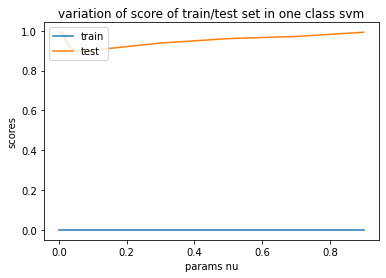

isolation forest
------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.01 score in train set is 0.0
c=0.01 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





c=0.01 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.02 score in train set is 0.0
c=0.02 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





c=0.02 score in tab texts is 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.03 score in train set is 0.0
c=0.03 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.03 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.04 score in train set is 0.0
c=0.04 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.04 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.05 score in train set is 0.0
c=0.05 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.05 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.06 score in train set is 0.0
c=0.06 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.06 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.07 score in train set is 0.0
c=0.07 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.07 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.08 score in train set is 0.0
c=0.08 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.08 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.09 score in train set is 0.0
c=0.09 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.09 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.1 score in train set is 0.0
c=0.1 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.1 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.3 score in train set is 0.0
c=0.3 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.3 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.5 score in train set is 0.0
c=0.5 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.5 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.7 score in train set is 0.0
c=0.7 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.7 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------>a before
------------------>a after
----------------------------------------->true[label]
c=0.9 score in train set is 0.0
c=0.9 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1



c=0.9 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------>a before
------------------>a after
----------------------------------------->true[label]
c=1 score in train set is 0.0
c=1 score in test set is 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     197.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     197.0
   macro avg       0.00      0.00      0.00     197.0
weighted avg       0.00      0.00      0.00     197.0





c=1 score in tab texts is 0.0
              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

'\nprint("======================================================================================")\nprint(" grid search OC SVM")\ngrid={\'gamma\':cs,\n      \'nu\':cs}\n#model = OneClassSVM(gamma=0.001, nu=c)\n#model.fit(tf_idf_matrix)\na=true[\'label\']\na=[1 if i==0 else -1 for i in a]\na=np.array(a)\nprint(tf_idf_matrix)\ngrid_search=GridSearchCV(OneClassSVM(),grid,verbose=1,cv=3,scoring=\'accuracy\')\ngrid_search.fit(tf_idf_matrix, a)\nprint(\'best parameters:\',grid_search.best_params_)\nprint(\'\n\')\nprint("======================================================================================")\n\n\nprint("======================================================================================")\nprint(" grid search IsolationForest")\ngrid={\'max_features\':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.3,0.5,0.7,0.9]}\n#model = OneClassSVM(gamma=0.001, nu=c)\n#model.fit(tf_idf_matrix)\ngrid_search=GridSearchCV(IsolationForest(n_estimators=50, max_samples=\'auto\', contaminat

In [ ]:

"""
texts=['Un accident de la circulation fait 5 morts et une trentaine de blessés sur l’axe Douala-Bafoussam',
    'Paul Biya instruit un déblocage des fonds',
     'Un accident de la circulation fait 2905 morts et une cinquantaine de blessés sur l’axe Douala-Edea',
     'Louis Marie Kakdeu soutient la greve des enseignants',
     'paul biya est mort',
     "Le sultan Bamoun n'affirme pas son appartenance au RDPC",
     "Le sultan Bamoun affirme son appartenance au RDPC",
     'Le Cameroun enregistre déjà 25millions de morts des suites de l’épidémie de rougeol',
     'Grève des enseignants : Paul Biya instruit le déblocage des fonds',
     ' Bayaola Boniface martèle que le personnel qui ne se soumettra pas à cette mesure durant cette période de grève des enseignants, subira les conséquences de son insubordination. Les décisions se prendront sur WhatsApp. C’est l’économie d’un élément audio du secrétaire d’État au ministère des Enseignements secondaires, dont nous avons pu obtenir une copie de sources internes. Les pouvoirs publics, impuissants devant les revendications du personnel enseignants depuis le 21 février dernier, veulent contourner le mouvement d’humeur afin de continuer à assurer la poursuite des programmes dans les établissements scolaires. En effet, dans un message vocal adressé à ses collaborateurs, Bayaola Boniface secrétaire d’Etat au ministère des Enseignements secondaires charge ces derniers à veiller à ce que le personnel administratif prenne le relai dans les établissements',
     'Le secrétaire d’État au MINESEC exige au personnel administratif de remplacer les enseignants grévistes dans les salles de classe',
    '" Ce matin, lors de l’ouverture de la séance à l’Assemblée nationale, un individu a fait irruption dans l’hémicycle et a lancé une banane sur Christiane Taubira en poussant des cris de bonobo, avant de prendre la fuite. Rattrapé par les agents de sécurité, l’auteur présumé de cette agression a été identifié comme étant Mehdi Meklat, égérie du Bondy Blog et étoile montante des Inrockuptibles. Lors de sa garde à vue, Mehdi Meklat aurait accusé son jumeau maléfique Marcelin Deschamps, avant de déclarer : “J’encule vos gros morts et je rafale Charlie Hebdo wallah sur ma vie qu’on va vous refaire un Magnanville avec mes kheys du Bondy Blog”.  Sur son compte Twitter, Christiane Taubira a immédiatement réagi en postant un message d’apaisement.  Pierre Siankowski, directeur de la rédaction des Inrockuptibles, a pour sa part salué la “performance artistique” du jeune trublion.  Quant à Pascale Clarke, elle n’a pas souhaité répondre à nos questions, invoquant une séance imminente d’aquaponey.',
    'Buzzbeed,"En visite en Afghanistan, Marine Le Pen refuse de participer à une lapidation"',
    'BGFI boucle le rachat de Camtel ,"la dénommée BGFI Bank Centrafrique devient ainsi la 32eme filiale du groupe et sa 21e dans la sous-région Americaine',
     "RSE : Société Générale Cameroun offre 3 millions de F dans le cadre de son Charity Challenge 2021,Le « Charity challenge 2021 », organisé par la banque a permis aux associations Ascovime et Chaîne des foyers Saint-Nicodème de bénéficier respectivement de 1,5 million de FCFA destinés au soutien vis-à-vis de la jeunesse défavorisée dont ils ont la charge.  Pour l’édition 2021 du « Charity Challenge » organisé par la Société Générale Cameroun, deux associations ont été retenues : Ascovime et la Chaîne des foyers Saint-Nicodème, des associations basées respectivement à Yaoundé et Douala. Placée sous le thème « Move For Youth », cette action citoyenne des employés de Société Générale Cameroun (SG Cameroun) a pour objectif de soutenir des associations œuvrant pour la jeunesse, par le biais d’un défi sportif. Au Cameroun, les villes de Yaoundé et de Douala ont été mises à contribution pour l’apothéose sportive (danse sportive) respectivement les 18 et 25 septembre 2021. 30 employés de SG Cameroun, ont à cet effet été mobilisés à Yaoundé, plus de 80 à Douala, à la Rue Joss, devant le siège de la banque. « Cet exercice de SG Cameroun s’inscrit dans la grande semaine solidarité du Groupe Société Générale qui cette année a pour objectif la jeunesse. Tous les salariés se sont mobilisés dans un élan solidaire et sportif », s’est exprimé Nicolas Pichou, le Directeur Général de SG Cameroun. Lire aussi : Droits sociaux: Société générale Cameroun sommée de négocier avec ses ex-employés Il s’agit précisément pour la banque de faire un pont entre les finances, l’éducation et l’insertion socio-professionnelle. « Le Charity Challenge de Société Générale est un challenge solidaire international connecté qui permet cette année de mobiliser l’ensemble des collaborateurs du groupe Société Générale du Cameroun autour de la cause des jeunes. Nous voulons accompagner la jeunesse dans son insertion. Nous avons une Fondation d’entreprise dont le rôle est de soutenir la communauté. Cette année nous accompagnons la jeunesse à travers le sport sur l’ensemble du pays. Il s’agit de générer des fonds par l’effort collectif de chacun », a relevé Blaise Etoa, le Directeur Marketing et Communication de SG Cameroun. Le concept ici implique la réalisation d’un pas, pour un montant de 3 FCFA. Au terme du « Charity Challenge 2021 », les collaborateurs de la banque ont cumulé 1 000 000 de pas, équivalent à une cagnotte de 3 millions de FCFA, à reverser aux deux associations bénéficiaires. « SG Cameroun s’est engagée à donner 3 FCFA pour chaque pas fait par les salariés, et nous sommes parvenus à plus de 3 millions de FCFA que nous avons remis à ces associations qui œuvrent pour la jeunesse défavorisée à Douala et à Yaoundé », a ajouté Nicolas Pichou. Lire aussi : Société générale Cameroun a accordé 802 milliards de crédits en 2020  L’Association des compétences pour une vie meilleure (Ascovime) et la Chaîne des foyers Saint-Nicodème ont respectivement reçu un chèque de 1,5 millions de FCFA. Ces deux associations ont été sélectionnées sur la base de rigoureux critères définis par Blaise Etoa : « ce sont des associations qui encadrent nos populations dans leurs activités au quotidien. La Chaîne des Foyers Saint-Nicodème exerce dans l’insertion professionnelle des enfants de la rue. Et Ascovime travaille pour la santé et l’éducation des enfants de nos zones enclavées », a clarifié le Directeur Marketing et Communication  de SG Cameroun. Le Dr. Boucar Ekani, vice-président d’Ascovime et le Père Serges Evina, Directeur de la Chaîne des Foyers Saint-Nicodème ont confirmé, au terme de la session sportive de ce samedi 25 septembre 2021, une affectation intégrale des fonds reçus au profit de leurs cibles respectives, tout en saluant l’action solidaire menée par banque. Pour rappel, depuis 2015, Société Générale Cameroun a consacré plus de 300 millions de FCFA à des actions solidaires au Cameroun. Les axes de mécénat et de sponsoring de cet établissement de crédits sont basés sur l’insertion socioprofessionnelle, le sport et la culture : « Toutes choses qui permettent après nos activités commerciales de pouvoir accompagner les communautés avec lesquelles nous travaillons au quotidien », a conclu Blaise Etoa. Lire aussi : Financement des PME : Société Générale Cameroun ouvre une ligne de crédit de 25 milliards Présente au Cameroun depuis 1963, Société Générale Cameroun dispose de 658 collaborateurs, 132 distributeurs automatiques de billets et 38 agences sur tout le territoire national. La banque compte par ailleurs 245.000 clients répartis entre les grandes entreprises, les petites et moyennes entreprises, les institutions, les professionnels et des particuliers.",
     "Le Cameroun enregistre déjà 45 morts des suites de l’épidémie de rougeole",
     "bruno bidjang n'est plus employe a vision 4",
     "paul biya est mort",
     "Bruno Bidjang n’a pas été limogé de Vision 4",
     "Bruno Bidjang a été limogé de Vision 4",
     "Nouhou Tolo a ete agressé dans une rue de Yaoundé"]
"""

print("======================================================================================")
print("OC SVM")
print("======================================================================================")
for el in texts:
     data.append(clean_text(el))
#lab=np.array([1,1,-1,-1,-1,-1,1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1])
freq_term_matrix3 = count_vectorizer.transform(data)
#print(freq_term_matrix2.)
testInput = tfidf.transform(freq_term_matrix3)
#xtrain, ytrain = train_test_split(tf_idf_matrix, test_size=0.3,random_state=25, shuffle=True)
#print((tf_idf_matrix))
#freq_term_matrix=[[21,21,42,2][53,32,12,53]]
cs=[0.001,0.002,0.003,0.004,0.005,0.007,0.008,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.3,0.5,0.7,0.9]
scores=[]
scores2=[]
for c in cs :    
     model = OneClassSVM(gamma=0.001, nu=c)
     model.fit(tf_idf_matrix)
     yhat = model.predict(tf_idf_matrix)
     #print('------------------>yhat before')
     #print(yhat)
     yhat=[1 if i==-1 else 0 for i in yhat]
     #false[false['label'] == 1] = -1
     #false[false['label'] == 0] = 1
     score2 = f1_score(true['label'], yhat)
     #print('------------------>yhat after')
     #print(yhat)
     print('c={} score in train set is {}'.format(c,score2))
     scores2.append(score2)
     print('end of fit ...')
     print('\n')
     yhat = model.predict(tf_idf_matrix2)
     yhat=[1 if i==-1 else 0 for i in yhat]
     #false[false['label'] == 1] = -1
     #false[false['label'] == 0] = 1
     score = f1_score(false['label'], yhat)
     #print(yhat)
     print('c={} score in test set is {}'.format(c,score))
     print(score)
     print(classification_report(false['label'], yhat))
     scores.append(score)
     #lab=np.array([0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1,1,0,1,0])
     #freq_term_matrix2 = count_vectorizer.transform(test['total'])
     
     yhat = model.predict(testInput)
     yhat=[1 if i==-1 else 0 for i in yhat]
     print('\n')
     #print(yhat)
     score = f1_score(lab, yhat)
     print('c={} score in tab texts is {}'.format(c,score))
     print(score)
     print(classification_report(lab, yhat))
     print('\n')
     if c==0.05:
          model1 = model
#plt.plot(cs)
plt.plot(cs,scores2)
plt.plot(cs,scores)
plt.title('variation of score of train/test set in one class svm')
plt.ylabel('scores')
plt.xlabel('params nu')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#model = OneClassSVM(gamma=0.001, nu=0.4)



#X_train, X_test, y_train, y_test

print("======================================================================================")
print("isolation forest")
print("======================================================================================")
cs=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.3,0.5,0.7,0.9,1]
for c in cs:
     model=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.0001,max_features=c)
     model.fit(tf_idf_matrix)
     a=model.predict(tf_idf_matrix)
     print('------------------>a before')
     #print(a)
     a=[1 if i==-1 else 0 for i in a]
     score = f1_score(a, true['label'])
     print('------------------>a after')
     #print(a)
     print('----------------------------------------->true[label]')
     #print(np.array(true['label']))
     print("c={} score in train set is {}".format(c,score))

     a=model.predict(tf_idf_matrix2)
     a=[1 if i==-1 else 0 for i in a]
     score = f1_score(a, false['label'])

     print("c={} score in test set is {}".format(c,score))
     print(classification_report(a, false['label']))
     print('\n')


     #print(testInput)
     yhat = model.predict(testInput)
     yhat=[1 if i==-1 else 0 for i in yhat]
     print('\n')
     #print(yhat)
     score = f1_score(lab, yhat)
     print('c={} score in tab texts is {}'.format(c,score))
     print(classification_report(lab, yhat))
     print('\n')

"""
print("======================================================================================")
print(" grid search OC SVM")
grid={'gamma':cs,
      'nu':cs}
#model = OneClassSVM(gamma=0.001, nu=c)
#model.fit(tf_idf_matrix)
a=true['label']
a=[1 if i==0 else -1 for i in a]
a=np.array(a)
print(tf_idf_matrix)
grid_search=GridSearchCV(OneClassSVM(),grid,verbose=1,cv=3,scoring='accuracy')
grid_search.fit(tf_idf_matrix, a)
print('best parameters:',grid_search.best_params_)
print('\n')
print("======================================================================================")


print("======================================================================================")
print(" grid search IsolationForest")
grid={'max_features':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.3,0.5,0.7,0.9]}
#model = OneClassSVM(gamma=0.001, nu=c)
#model.fit(tf_idf_matrix)
grid_search=GridSearchCV(IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.02)),grid,scoring='accuracy',cv=3)
grid_search.fit(tf_idf_matrix, a)
print('best parameters:',grid_search.best_params_)
print('\n')
print("======================================================================================")
 """

In [ ]:
"""
for el in texts:
     data.append(clean_text(el))
#lab=np.array([1,1,-1,-1,-1,-1,1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1])
freq_term_matrix3 = count_vectorizer.transform(data)
#print(freq_term_matrix2.)
testInput = tfidf.transform(freq_term_matrix3)

#OC SVM
modelA = OneClassSVM(gamma=0.001, nu=c)
yhat = modelA.predict(testInput)
yhat=[1 if i==-1 else 0 for i in yhat]
print('\n')
#print(yhat)
score = f1_score(np.array(lab), np.array(yhat))
print('c={} score of OneCSvm in tab texts is {}'.format(c,score))
print(classification_report(np.array(lab), np.array(yhat)))
print('\n')

#Isolation forest
modelB=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.02),max_features=0.8)
yhat = modelB.predict(testInput)
yhat=[1 if i==-1 else 0 for i in yhat]
print('\n')
#print(yhat)
score = f1_score(np.array(lab), np.array(yhat))
print('c={} score of Isolation Forest in tab texts is {}'.format(c,score))
print(classification_report(np.array(lab), np.array(yhat)))
print('\n')
"""

"\nfor el in texts:\n     data.append(clean_text(el))\n#lab=np.array([1,1,-1,-1,-1,-1,1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1])\nfreq_term_matrix3 = count_vectorizer.transform(data)\n#print(freq_term_matrix2.)\ntestInput = tfidf.transform(freq_term_matrix3)\n\n#OC SVM\nmodelA = OneClassSVM(gamma=0.001, nu=c)\nyhat = modelA.predict(testInput)\nyhat=[1 if i==-1 else 0 for i in yhat]\nprint('\n')\n#print(yhat)\nscore = f1_score(np.array(lab), np.array(yhat))\nprint('c={} score of OneCSvm in tab texts is {}'.format(c,score))\nprint(classification_report(np.array(lab), np.array(yhat)))\nprint('\n')\n\n#Isolation forest\nmodelB=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.02),max_features=0.8)\nyhat = modelB.predict(testInput)\nyhat=[1 if i==-1 else 0 for i in yhat]\nprint('\n')\n#print(yhat)\nscore = f1_score(np.array(lab), np.array(yhat))\nprint('c={} score of Isolation Forest in tab texts is {}'.format(c,score))\nprint(classification_report(np.array(lab), np.ar

##### Pipeline

In [167]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [168]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [169]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    #('clf', linear_model.LogisticRegression(C=100000,n_jobs=-1,max_iter=600)),
    ('clf', OneClassSVM(gamma=0.001, nu=0.05)),
    #AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=50)
])
"""
params = [
        {
         'clf__gamma': [0.001,0.002,0.003],
         'clf__nu':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.3,0.5,0.7,0.9,1]
         }
]

gridsearch = GridSearchCV(pipeline, params, verbose=1,cv=3,scoring='accuracy').fit(true['total'], true['label'])
print('Final score is: ', gridsearch.score(false['total'], false['label']))
"""

"\nparams = [\n        {\n         'clf__gamma': [0.001,0.002,0.003],\n         'clf__nu':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.3,0.5,0.7,0.9,1]\n         }\n]\n\ngridsearch = GridSearchCV(pipeline, params, verbose=1,cv=3,scoring='accuracy').fit(true['total'], true['label'])\nprint('Final score is: ', gridsearch.score(false['total'], false['label']))\n"

In [170]:
pipeline.fit(true['total'], true['label'])
#print(gridsearch.best_params_)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', OneClassSVM(gamma=0.001, nu=0.05))])

In [171]:
from sklearn.metrics import accuracy_score
s=pipeline.predict(false['total'])
s=[1 if i==-1 else 0 for i in s]
print(accuracy_score(s,false['label']))
print(classification_report(s,false['label']))

0.9187817258883249
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.92      1.00      0.96       181

    accuracy                           0.92       197
   macro avg       0.46      0.50      0.48       197
weighted avg       0.84      0.92      0.88       197



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### One Class Classifier

In [172]:
print(model1)

OneClassSVM(gamma=0.001, nu=0.05)


In [173]:
#saving the pipeline
from sklearn.pipeline import Pipeline
import joblib
filename = save_path+'pipeline1.sav'
joblib.dump(pipeline, filename)



['/content/drive/MyDrive/pipeline1.sav']

##### Deep Learning Model

In [174]:

loaded_model = joblib.load(filename)
"""
tab = ["Choupo-Moting ne dansant pas après le limogeage de Toni Conceiçao,depuis le 28 février 2022 sur Facebook prétend montrer linternational camerounais Éric Maxim Choupo-Moting en train de danser suite au limogeage de Toni Conceiçao sur la sellette après la défaite du Cameroun face à lÉgypte en demi-finale de la Coupe dAfrique des nations (CAN) qua organisée le pays. Quand Choupo Moting apprend que Conceçao vient dêtre viré. La terre est vraiment très sale?. On y voit lattaquant du Bayern de Munich descendre de son véhicule et esquisser des pas de danse au sol sur le titre ?Wolosso ?du chanteur ivoirien Dollar DJ sport facebook",
                      "Tribune de la Forêt, ERIC FOPOUSSI A  ÉTÉ VIRÉ DU GROUPE EQUINOXE,Médias : Eric Fopoussi vient dêtre viré dEquinoxe TV pour ses prises de position positives sur le stade dOlembé ,,media",
                      ",NZui manto Yi sep sep, DES ÉLÈVES DU LYCÉE CLASSIQUE DE BAFOUSSAM FONT COURS DANS DES TOILETTES,KAMALOUM NEWS LES ÉLÈVES DU LYCÉE CLASSIQUE MODERNE DE BAFOUSSAM FONT COURS DANS LES TOILETTES ! (Sic) », la publication montre des garçons et filles en uniforme de classe de couleur bleue, assis sur des table-bancs contenant des cahiers. Ces élèves regardent pour la plupart, dans la direction du tableau noir, collé sur un mur partiellement carrelé. Sur les photos, les côtés du mur ne sont pas les seuls coins qui contiennent les carreaux. Le sol en a également. Et tout comme les murs, ils sont posés par endroit, avec des espaces contenant du siphon. Le type de carreaux et le syphon au sol porte à croire quil sagit bien des toilettes qui, visiblement, ont été transformées en salle de classe,societe",
                      "Bree Magazine,LE MINAT A  DÉCLARÉ EJ JOHNSON PERSONA NON GRATA AU CAMEROUN,EJ Johnson, le fils du célèbre basketteur américain Magic Johnson invité par lUnesco à se rendre au Cameroun a été déclaré persona non grata par le ministre de ladministration territoriale, Paul Ntanga Nji Insolite",
                      "Love kamers sisters ,AUGMENTATION DU PRIX DU GAZ EN VUE,Daprès plusieurs publications devenues virales en début de semaine sur les réseaux sociaux et notamment Facebook, le prix du gaz domestique va passer de 6500 F Cfa à 7320 voire 7500 F Cfa. economie",
                      "Le Fonds monétaire international fournit des dons,,Le Fonds monétaire international fournit des dons en espèces pour aider les gens à traverser COVID-19. Chaque bénéficiaire recevra 1 500 Dollars par mois pendant 3 mois",
                     "PARLE QUE BETI,,Voici les jardiniers bulu Beti en train de mettre la peinture verte sur la pelouse de Japoma. Quelle honte pour mon pays. Un stade au niveau mondial mon il",
                      "Fridolin Nke,« Stop Noso war » et « Free prisoners »,Des poignets menottés illustrent le visuel. Un texte accompagne ces photos.  S. E. Monsieur lambassadeur Albert Roger Milla, S. M. Joseph Antoine Bell, lhonorable Cabral Libiii, le président Samuel Etoo Fils, le comédien célèbre Steve Fah nous rejoignent dans le combat contre la Guerre au NOSO ! MIEUX VAUT TARD QUE JAMAIS. La conscience ne meurt jamais, malgré les endormissements douillets de lhuile de la sardine. NE COMMENTEZ PAS svp !",
                      "le prix de lessence est revu à la baisse au Cameroun",
                      "scoop,Le domicile de clinton Njie situé à Bokwaongo( sud-ouest) incendié hier soir",
                      "NEIGE À BANA,Depuis jeudi dernier, comme une trainée de poudre, la nouvelle de la neige tombée dans cette localité de la région de lOuest est devenue virale sur les réseaux sociaux.Insolite"
                     "Réchauffement climatique: le taux de N2 a dépassé les 50 de présence dans notre atmosphère!,Le GIEC vient de lancer un nouvel appel d’urgence aux dirigeants politiques de tous les Etats! Selon un dernier rapport scientifique, le taux de N2 (diazote) aurait dépassé la barre des 50 de la composition de notre atmosphère. Un record historique, vraisemblablement jamais atteint dans l’histoire de la Terre. Selon Franz R. Shmidt, l’un des scientifiques ayant participé à cette étude, le fait que le seuil de N2 dans notre atmosphère ait dépassé la barre des 50% indique un point clair de non retour: « Nous étions triste lorsque nous avons découvert cela! Jamais ce seuil n’avait été franchi, maintenant les conséquences sur notre planète seront inévitables. C’est un point de non retour que nous avons atteint, même si dans dans un avenir proche, ce taux devait redescendre. Mais nous d’autant pessimistes que, selon nos calculs, ce taux de concentration dans l’atmosphère devrait atteindre 78% en 2100, si nous continuons comme cela! ». Le Président de la République française, Emmanuel Macron, est prêt à lancer l’état d’urgence en France. Mais rien ne presse dans les prochaines heures, a-t-il indiqué au micro de nos confrères de Centrepress. Certaines confirmations doivent encore tomber d’ici les jours qui suivent. Le gouvernement devra donc réagir en conséquence."
                     ]
"""


#result=loaded_model.predict(['Après cet acte XVI, le container du bureau de Benjamin Griveaux reste, selon un sondage, la poubelle que rêve de brûler plus d’un gilet jaune sur deux. En dépit de ce que prédisaient de nombreux experts, les gilets jaunes ne se sont finalement pas emparés d’un mirage 2000 pour forcer la porte du local à poubelle du porte parole du gouvernement. L’autoroute A10 '])
#result=loaded_model.predict(texts)
#print(result) 

from sklearn.metrics import accuracy_score
s=pipeline.predict(texts)
s=[1 if i==-1 else 0 for i in s]
print(accuracy_score(s,lab))
print(classification_report(s,lab))

0.5652173913043478
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.57      0.72        23

    accuracy                           0.57        23
   macro avg       0.50      0.28      0.36        23
weighted avg       1.00      0.57      0.72        23



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input,GlobalMaxPool1D,Dropout,GaussianNoise
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import Input,GlobalMaxPool1D,Dropout,concatenate
from tensorflow.keras.models import Model
import tensorflow as tf
import nltk
import re
from nltk.corpus import stopwords #corpus is collection of text
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
vo_size=200
#X_train = train['total']
#Y_train = train['label']
weight={0:0.01, 1:600}

In [201]:
onehot_rep_text = [one_hot(words, vo_size) for words in X_train]
embedded_doc_text=pad_sequences(onehot_rep_text, padding='pre', maxlen=400)
X_final_text=np.array(embedded_doc_text)
y_final=np.array(Y_train)

In [202]:
# model 1 build 
embedding_vector_feature = 200
model=Sequential()
model.add(Embedding(vo_size,embedding_vector_feature,input_length=400))
model.add(LSTM(200))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 400, 200)          40000     
                                                                 
 lstm_5 (LSTM)               (None, 200)               320800    
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 361,001
Trainable params: 361,001
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
13/13 [==============================] - 69s 5s/step - loss: 0.1888 - accuracy: 0.9540 - val_loss: 0.6301 - val_accuracy: 0.8517
Epoch 2/10
13/13 [==============================] - 67s 5s/step - loss: 0.1360 - accuracy: 1.0000 - val_loss: 0.6367 - val_accuracy: 0.8517
Epoch 3/10
13/13 [==============================] - 67s 5s/step - loss: 0.1320 - accuracy: 0.9994 - val_loss: 0.6125 - val_accuracy: 0.8442
Epoch 4/10
13/13 [==============================] - 80s 6s/step - loss: 0.0966 - accuracy: 0.9994 - val_loss: 0.5507 - val_accuracy: 0.8495
Epoch 5/10
13/13 [==============================] - 70s 5s/step - loss: 0.0841 - accuracy: 1.0000 - val_loss: 0.4288 - val_accuracy: 0.8517
Epoch 6/10
13/13 [==============================] - 67s 5s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4366 - val_accuracy: 0.8517
Epoch 7/10
13/13 [==============================] - 67s 5s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4483 - val_accuracy: 0.8517
Epoch 8/10
13/13 [==

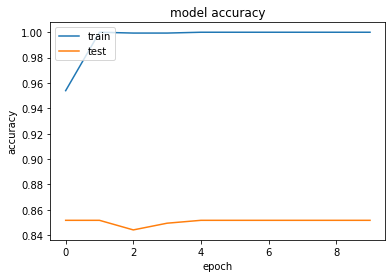

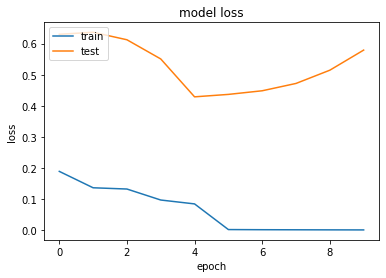

In [203]:
# train
historyA = model.fit(x=[X_final_text], y=y_final,class_weight=weight, batch_size=256, epochs=10, verbose=1, validation_split=0.3)
#model.save_weights("model_multi1.h5")
#print(history.history)
print('end of fit :)')

model_json = model.to_json()
with open(save_path+"model_asupA1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(save_path+"model_asupA1.h5")

plt.plot(historyA.history['accuracy'])
plt.plot(historyA.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(historyA.history['loss'])
plt.plot(historyA.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [204]:
data=[]
"""
texts=["Choupo-Moting ne dansant pas après le limogeage de Toni Conceiçao,depuis le 28 février 2022 sur Facebook prétend montrer linternational camerounais Éric Maxim Choupo-Moting en train de danser suite au limogeage de Toni Conceiçao sur la sellette après la défaite du Cameroun face à lÉgypte en demi-finale de la Coupe dAfrique des nations (CAN) qua organisée le pays. Quand Choupo Moting apprend que Conceçao vient dêtre viré. La terre est vraiment très sale?. On y voit lattaquant du Bayern de Munich descendre de son véhicule et esquisser des pas de danse au sol sur le titre ?Wolosso ?du chanteur ivoirien Dollar DJ sport facebook",
                      "Tribune de la Forêt, ERIC FOPOUSSI A  ÉTÉ VIRÉ DU GROUPE EQUINOXE,Médias : Eric Fopoussi vient dêtre viré dEquinoxe TV pour ses prises de position positives sur le stade dOlembé ,,media",
                      ",NZui manto Yi sep sep, DES ÉLÈVES DU LYCÉE CLASSIQUE DE BAFOUSSAM FONT COURS DANS DES TOILETTES,KAMALOUM NEWS LES ÉLÈVES DU LYCÉE CLASSIQUE MODERNE DE BAFOUSSAM FONT COURS DANS LES TOILETTES ! (Sic) », la publication montre des garçons et filles en uniforme de classe de couleur bleue, assis sur des table-bancs contenant des cahiers. Ces élèves regardent pour la plupart, dans la direction du tableau noir, collé sur un mur partiellement carrelé. Sur les photos, les côtés du mur ne sont pas les seuls coins qui contiennent les carreaux. Le sol en a également. Et tout comme les murs, ils sont posés par endroit, avec des espaces contenant du siphon. Le type de carreaux et le syphon au sol porte à croire quil sagit bien des toilettes qui, visiblement, ont été transformées en salle de classe,societe",
                      "Bree Magazine,LE MINAT A  DÉCLARÉ EJ JOHNSON PERSONA NON GRATA AU CAMEROUN,EJ Johnson, le fils du célèbre basketteur américain Magic Johnson invité par lUnesco à se rendre au Cameroun a été déclaré persona non grata par le ministre de ladministration territoriale, Paul Ntanga Nji Insolite",
                      "Love kamers sisters ,AUGMENTATION DU PRIX DU GAZ EN VUE,Daprès plusieurs publications devenues virales en début de semaine sur les réseaux sociaux et notamment Facebook, le prix du gaz domestique va passer de 6500 F Cfa à 7320 voire 7500 F Cfa. economie",
                      "Le Fonds monétaire international fournit des dons,,Le Fonds monétaire international fournit des dons en espèces pour aider les gens à traverser COVID-19. Chaque bénéficiaire recevra 1 500 Dollars par mois pendant 3 mois",
                     "PARLE QUE BETI,,Voici les jardiniers bulu Beti en train de mettre la peinture verte sur la pelouse de Japoma. Quelle honte pour mon pays. Un stade au niveau mondial mon il",
                      "Fridolin Nke,« Stop Noso war » et « Free prisoners »,Des poignets menottés illustrent le visuel. Un texte accompagne ces photos.  S. E. Monsieur lambassadeur Albert Roger Milla, S. M. Joseph Antoine Bell, lhonorable Cabral Libiii, le président Samuel Etoo Fils, le comédien célèbre Steve Fah nous rejoignent dans le combat contre la Guerre au NOSO ! MIEUX VAUT TARD QUE JAMAIS. La conscience ne meurt jamais, malgré les endormissements douillets de lhuile de la sardine. NE COMMENTEZ PAS svp !",
                      "le prix de lessence est revu à la baisse au Cameroun",
                      "scoop,Le domicile de clinton Njie situé à Bokwaongo( sud-ouest) incendié hier soir",
                      "NEIGE À BANA,Depuis jeudi dernier, comme une trainée de poudre, la nouvelle de la neige tombée dans cette localité de la région de lOuest est devenue virale sur les réseaux sociaux.Insolite"
                     "Réchauffement climatique: le taux de N2 a dépassé les 50 de présence dans notre atmosphère!,Le GIEC vient de lancer un nouvel appel d’urgence aux dirigeants politiques de tous les Etats! Selon un dernier rapport scientifique, le taux de N2 (diazote) aurait dépassé la barre des 50 de la composition de notre atmosphère. Un record historique, vraisemblablement jamais atteint dans l’histoire de la Terre. Selon Franz R. Shmidt, l’un des scientifiques ayant participé à cette étude, le fait que le seuil de N2 dans notre atmosphère ait dépassé la barre des 50% indique un point clair de non retour: « Nous étions triste lorsque nous avons découvert cela! Jamais ce seuil n’avait été franchi, maintenant les conséquences sur notre planète seront inévitables. C’est un point de non retour que nous avons atteint, même si dans dans un avenir proche, ce taux devait redescendre. Mais nous d’autant pessimistes que, selon nos calculs, ce taux de concentration dans l’atmosphère devrait atteindre 78% en 2100, si nous continuons comme cela! ». Le Président de la République française, Emmanuel Macron, est prêt à lancer l’état d’urgence en France. Mais rien ne presse dans les prochaines heures, a-t-il indiqué au micro de nos confrères de Centrepress. Certaines confirmations doivent encore tomber d’ici les jours qui suivent. Le gouvernement devra donc réagir en conséquence."
                     ]
"""


for el in texts:
     data.append(clean_text(el))
#lab=np.array([0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1,1,0,1,0])
onehot_rep = [one_hot(words, vo_size) for words in data]
embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=400)
X_test_final=np.array(embedded_doc)
y_pred_final=model.predict(X_test_final)
print((1-y_pred_final)*100)
#print('score:{}'.format(accuracy_score(y_pred_final, lab)))
#tab=(1-y_pred_final)*100
tab=[]
#print((y_pred_final['0']))
for j in y_pred_final:
     tab.append((1-j[0])*100)
rep=[]
print('tab {}'.format(tab))
for i in tab:
     if i>=50:
          rep.append(0)
     else:
          rep.append(1)
print(rep)
print(classification_report(rep, lab))
print('accuracy is {}'.format(accuracy_score(rep, lab)))
cm3 = confusion_matrix(rep, lab)
print(cm3)

[[97.64923 ]
 [97.28357 ]
 [97.45681 ]
 [96.77633 ]
 [96.2342  ]
 [97.19339 ]
 [97.318665]
 [97.97767 ]
 [97.29807 ]
 [96.605515]
 [97.58536 ]
 [97.6337  ]
 [97.17488 ]
 [98.19578 ]
 [97.68215 ]
 [98.01348 ]
 [96.63107 ]
 [96.2342  ]
 [94.90235 ]
 [95.07873 ]
 [97.48249 ]
 [97.91509 ]
 [97.605804]]
tab [97.6492315530777, 97.28356599807739, 97.4568098783493, 96.77633047103882, 96.23419940471649, 97.1933901309967, 97.3186582326889, 97.9776680469513, 97.29807376861572, 96.60551249980927, 97.58535325527191, 97.63369262218475, 97.17488288879395, 98.19577634334564, 97.68214821815491, 98.01348745822906, 96.63107097148895, 96.23419940471649, 94.90235149860382, 95.07872760295868, 97.48249351978302, 97.91509211063385, 97.60579764842987]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0       1.00      0.43      0.61        23
           1       0.00      0.00      0.00         0

    accuracy                 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [205]:
embedding_vector_feature_text = 200

input_text=Input(shape=(400,))
emb_text = Embedding(vo_size,embedding_vector_feature_text)(input_text)
lstm_text = LSTM(128, return_sequences=True)(emb_text)
max_pool_text = GlobalMaxPool1D()(lstm_text)
dropout_1_text = Dropout(0.1)(max_pool_text)
dense_1_text = Dense(50, activation='relu')(dropout_1_text)
dropout_2_text = Dropout(0.1)(dense_1_text)

#out = concatenate([lstm_title,dropout_2_text],axis=-1)
output=Dense(1, activation='sigmoid')(dropout_2_text)

model = Model(inputs=[input_text], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 400, 200)          40000     
                                                                 
 lstm_6 (LSTM)               (None, 400, 128)          168448    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 50)                6450      
                                                           

In [194]:
# train
historyB = model.fit(x=[X_final_text], y=y_final,class_weight=weight, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

#model.save_weights("model_multi.h5")
# Save model
# serialize model to JSON
model_json = model.to_json()
with open(save_path+"model_asupB1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(save_path+"model_asupB1.h5")



Epoch 1/10
14/14 [==============================] - 43s 3s/step - loss: 0.7286 - accuracy: 0.9997 - val_loss: 0.9393 - val_accuracy: 0.7778
Epoch 2/10
14/14 [==============================] - 40s 3s/step - loss: 0.3536 - accuracy: 0.9997 - val_loss: 0.6860 - val_accuracy: 0.7778
Epoch 3/10
14/14 [==============================] - 40s 3s/step - loss: 0.3178 - accuracy: 0.9997 - val_loss: 0.7044 - val_accuracy: 0.7778
Epoch 4/10
14/14 [==============================] - 41s 3s/step - loss: 0.2929 - accuracy: 0.9997 - val_loss: 0.6557 - val_accuracy: 0.7778
Epoch 5/10
14/14 [==============================] - 40s 3s/step - loss: 0.3279 - accuracy: 0.9997 - val_loss: 0.5956 - val_accuracy: 0.7778
Epoch 6/10
14/14 [==============================] - 49s 4s/step - loss: 0.3261 - accuracy: 0.9997 - val_loss: 0.5875 - val_accuracy: 0.7778
Epoch 7/10
14/14 [==============================] - 41s 3s/step - loss: 0.2478 - accuracy: 0.9997 - val_loss: 0.6048 - val_accuracy: 0.7778
Epoch 8/10
14/14 [==

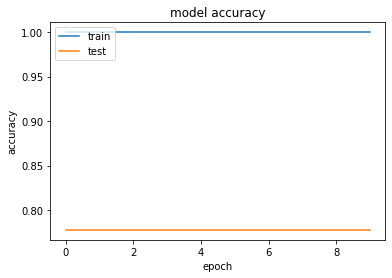

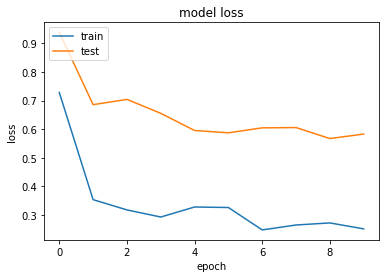

In [195]:
plt.plot(historyB.history['accuracy'])
plt.plot(historyB.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(historyB.history['loss'])
plt.plot(historyB.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [196]:
data=[]


for el in texts:
     data.append(clean_text(el))
onehot_rep = [one_hot(words, vo_size) for words in data]
embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=400)
X_test_final=np.array(embedded_doc)
y_pred_final=model.predict(X_test_final)
print((1-y_pred_final)*100)
#print('score:{}'.format(accuracy_score(y_pred_final, lab)))
tab=[]
"print(y_pred_final['0'])"
for j in y_pred_final:
     tab.append((1-j[0])*100)
rep=[]
print('tab {}'.format(tab))
rep=[]
for i in tab:
     if i>=50:
          rep.append(0)
     else:
          rep.append(1)
print('rep {}'.format(rep))
print('lab {}'.format(lab))
print(classification_report(rep, lab))
print('accuracy is {}'.format(accuracy_score(rep, lab)))
cm3 = confusion_matrix(rep, lab)
print(cm3)

[[91.31109 ]
 [88.83481 ]
 [90.77854 ]
 [89.86516 ]
 [88.52303 ]
 [88.83242 ]
 [88.69466 ]
 [91.272064]
 [89.05041 ]
 [93.026276]
 [90.16938 ]
 [93.65406 ]
 [89.92356 ]
 [90.96314 ]
 [96.29453 ]
 [91.54539 ]
 [89.55815 ]
 [88.52303 ]
 [88.33698 ]
 [88.37514 ]
 [89.9027  ]
 [90.413246]
 [90.31256 ]]
tab [91.31108522415161, 88.83480727672577, 90.77854454517365, 89.86516296863556, 88.52303624153137, 88.83242011070251, 88.69465291500092, 91.27206802368164, 89.05040621757507, 93.02627444267273, 90.16937911510468, 93.65406334400177, 89.92356359958649, 90.96314311027527, 96.29453122615814, 91.5453851222992, 89.55814838409424, 88.52303624153137, 88.33698332309723, 88.37514221668243, 89.90270495414734, 90.41325151920319, 90.31256437301636]
rep [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lab [0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1]
              precision    recall  f1-score   support

           0       1.00      0.43      0.61        23
           1       0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
"""
# Save model
# serialize model to JSON
model_json = model.to_json()
with open("model_asup1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_asup1.h5")
"""

'\n# Save model\n# serialize model to JSON\nmodel_json = model.to_json()\nwith open("model_asup1.json", "w") as json_file:\n    json_file.write(model_json)\n# serialize weights to HDF5\nmodel.save_weights("model_asup1.h5")\n'

In [198]:
"""
dat=[]
tab=['Paul Biya instruit un déblocage des fonds',
     'Un accident de la circulation fait 2905 morts et une trentaine de blessés sur l’axe Douala-Bafoussam',
     'Louis Marie Kakdeu soutient la greve des enseignants'
     'paul biya est mort',
     "Le sultan Bamoun n'affirme pas son appartenance au RDPC",
     'Le Cameroun enregistre déjà 25millions de morts des suites de l’épidémie de rougeol',
     'Grève des enseignants : Paul Biya instruit le déblocage des fonds',
     ' Bayaola Boniface martèle que le personnel qui ne se soumettra pas à cette mesure durant cette période de grève des enseignants, subira les conséquences de son insubordination. Les décisions se prendront sur WhatsApp. C’est l’économie d’un élément audio du secrétaire d’État au ministère des Enseignements secondaires, dont nous avons pu obtenir une copie de sources internes. Les pouvoirs publics, impuissants devant les revendications du personnel enseignants depuis le 21 février dernier, veulent contourner le mouvement d’humeur afin de continuer à assurer la poursuite des programmes dans les établissements scolaires. En effet, dans un message vocal adressé à ses collaborateurs, Bayaola Boniface secrétaire d’Etat au ministère des Enseignements secondaires charge ces derniers à veiller à ce que le personnel administratif prenne le relai dans les établissements',
     'Le secrétaire d’État au MINESEC exige au personnel administratif de remplacer les enseignants grévistes dans les salles de classe'
]
#result=loaded_model.predict(['Après cet acte XVI, le container du bureau de Benjamin Griveaux reste, selon un sondage, la poubelle que rêve de brûler plus d’un gilet jaune sur deux. En dépit de ce que prédisaient de nombreux experts, les gilets jaunes ne se sont finalement pas emparés d’un mirage 2000 pour forcer la porte du local à poubelle du porte parole du gouvernement. L’autoroute A10 '])
for el in tab:
     dat.append(clean_text(el))
lab=np.ones(len(texts))

onehot_rep = [one_hot(words, vo_size) for words in dat]
embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=400)
X_test_final=np.array(embedded_doc)
y_pred_final=model.predict(X_test_final)
print(y_pred_final)
"""

'\ndat=[]\ntab=[\'Paul Biya instruit un déblocage des fonds\',\n     \'Un accident de la circulation fait 2905 morts et une trentaine de blessés sur l’axe Douala-Bafoussam\',\n     \'Louis Marie Kakdeu soutient la greve des enseignants\'\n     \'paul biya est mort\',\n     "Le sultan Bamoun n\'affirme pas son appartenance au RDPC",\n     \'Le Cameroun enregistre déjà 25millions de morts des suites de l’épidémie de rougeol\',\n     \'Grève des enseignants : Paul Biya instruit le déblocage des fonds\',\n     \' Bayaola Boniface martèle que le personnel qui ne se soumettra pas à cette mesure durant cette période de grève des enseignants, subira les conséquences de son insubordination. Les décisions se prendront sur WhatsApp. C’est l’économie d’un élément audio du secrétaire d’État au ministère des Enseignements secondaires, dont nous avons pu obtenir une copie de sources internes. Les pouvoirs publics, impuissants devant les revendications du personnel enseignants depuis le 21 février der

In [206]:
import numpy as np
import nltk
import re
from nltk.corpus import stopwords #corpus is collection of text
from nltk.stem.porter import PorterStemmer
import pandas
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from datetime import datetime
import json
import requests
from keras.models import model_from_json

#model = tf.keras.models.load_model('model_text.h5')
# load json and create model
json_file = open(save_path+'model_asupB1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(save_path+"model_asupB1.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data


dat=[]
tab=texts
    #result=loaded_model.predict(['Après cet acte XVI, le container du bureau de Benjamin Griveaux reste, selon un sondage, la poubelle que rêve de brûler plus d’un gilet jaune sur deux. En dépit de ce que prédisaient de nombreux experts, les gilets jaunes ne se sont finalement pas emparés d’un mirage 2000 pour forcer la porte du local à poubelle du porte parole du gouvernement. L’autoroute A10 '])
for el in tab:
     dat.append(clean_text(el))

onehot_rep = [one_hot(words, vo_size) for words in dat]
#print('onehot_rep',onehot_rep)
embedded_doc=pad_sequences(onehot_rep, padding='pre', maxlen=400)
#print('embedded_doc',embedded_doc)
X_test_final=np.array(embedded_doc)
#print('X_test_final',X_test_final)
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
y_pred_final=loaded_model.predict(X_test_final)
#print('y_pred_final',y_pred_final)
print((1-y_pred_final)*100)
tab=[]
"print(y_pred_final['0'])"
for j in y_pred_final:
     tab.append((1-j[0])*100)
rep=[]
print('tab {}'.format(tab))
rep=[]
for i in tab:
     if i>=50:
          rep.append(0)
     else:
          rep.append(1)
print('rep {}'.format(rep))
print('lab {}'.format(lab))
print(classification_report(rep, lab))
print('accuracy is {}'.format(accuracy_score(rep, lab)))
cm3 = confusion_matrix(rep, lab)
print(cm3)


Loaded model from disk
[[91.31109 ]
 [88.83481 ]
 [90.77854 ]
 [89.86516 ]
 [88.52303 ]
 [88.83242 ]
 [88.69466 ]
 [91.272064]
 [89.05041 ]
 [93.026276]
 [90.16938 ]
 [93.65406 ]
 [89.92356 ]
 [90.96314 ]
 [96.29453 ]
 [91.54539 ]
 [89.55815 ]
 [88.52303 ]
 [88.33698 ]
 [88.37514 ]
 [89.9027  ]
 [90.413246]
 [90.31256 ]]
tab [91.31108522415161, 88.83480727672577, 90.77854454517365, 89.86516296863556, 88.52303624153137, 88.83242011070251, 88.69465291500092, 91.27206802368164, 89.05040621757507, 93.02627444267273, 90.16937911510468, 93.65406334400177, 89.92356359958649, 90.96314311027527, 96.29453122615814, 91.5453851222992, 89.55814838409424, 88.52303624153137, 88.33698332309723, 88.37514221668243, 89.90270495414734, 90.41325151920319, 90.31256437301636]
rep [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lab [0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1]
              precision    recall  f1-score   support

           0       1.00      0.43      0.61        23
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
